### Write train and evaluation sh

In [5]:

class args_mod:
    def __init__(self) -> None:
        self.data = 'FashionMinist'
        self.arch = 'ResNet20-4'
        self.epoch = 200
opt = args_mod()

# best_transform.extend(old_best_transform)
# best_transform = ['21-12-3', '24-15-43']
best_transform = old_best_transform
temp = []
for transform in best_transform:
    if transform not in temp:
        temp.append(transform)
best_transform = temp
# best_transform

with open('/home/zx/New_atsp/ATSPrivacy-new/benchmark/run/benchmark_train_v5.sh','w') as f:
    # train
    for idx, transform in enumerate(best_transform):
        if isinstance(transform, tuple):
            command = f'CUDA_VISIBLE_DEVICES={idx%2} python benchmark/cifar100_train.py --data={opt.data} --arch={opt.arch} --epochs={opt.epoch} --aug_list={transform[0][:-4]} --mode=aug >> logout_{transform[0][:-4]} &'
        else:
            command = f'CUDA_VISIBLE_DEVICES={idx%2} python benchmark/cifar100_train.py --data={opt.data} --arch={opt.arch} --epochs={opt.epoch} --aug_list={transform} --mode=aug >> logout_{transform} &'
        f.write(command+'\n')
        if idx%2 == 1:
            f.write('wait'+'\n')  
    # attack
    # for idx, transform in enumerate(best_transform):
    #     if isinstance(transform, tuple):
    #         command = f'CUDA_VISIBLE_DEVICES={idx%2} python benchmark/cifar100_attack.py --data={opt.data} --arch={opt.arch} --epochs={opt.epoch} --aug_list={transform[0][:-4]} --mode=aug --optim=inversed &'
    #     else:
    #         command = f'CUDA_VISIBLE_DEVICES={idx%2} python benchmark/cifar100_attack.py --data={opt.data} --arch={opt.arch} --epochs={opt.epoch} --aug_list={transform} --mode=aug --optim=inversed &'
    #     f.write(command+'\n')
    #     if idx%2 == 1:
    #         f.write('wait'+'\n')

    
  

### Load PSNR

In [17]:
import numpy as np
import torch
import os
from typing import Dict, List, Set, Tuple
from pathlib import Path
from collections import defaultdict
import re
def load_psnr(imgs_dir: str='/home/zx/New_atsp/ATSPrivacy-new/benchmark/images')-> Dict[str, Dict[str, np.array]] :
    """compute psnr from metric.npy file 
    
    it load the psnr from metric.npy and return the average and sd of psnr

    Args:
        imgs_dir: the position of images
    
    Return:
        policy_psnr: the average and sd results of psnr, shape like [policy_name:{'mean':..., 'sd':...}] 
        i.e. ['0-0-0':{'mean':0.0, 'sd':1.0}] 

    """
    policy_psnr = defaultdict(dict)
    imgs_parent_dir = Path(imgs_dir)


    for dirname in imgs_parent_dir.iterdir():
        for metric_path in dirname.glob('metric.npy'):

            content = np.load(str(metric_path),allow_pickle=True).tolist()
            psnr_for_100 = [item['test_psnr'] for item in content]

            name = dirname.name
            data = re.search(pattern='data_.*?(_|$)', string=name)
            arch = re.search(pattern='arch_.*?(_|$)', string=name)
            atk = re.search(pattern='atk_.*?(_|$)', string=name)
            policy = re.search(pattern='auglist_.*?(_|$)', string=name)
            policy_name = '_'.join([ match.group().split('_')[1] for match in [data, arch, atk, policy] if match is not None])

            policy_psnr[policy_name]['mean'] = np.mean(psnr_for_100)
            policy_psnr[policy_name]['sd'] = np.var(psnr_for_100)

    return policy_psnr




In [26]:
from pathlib import Path
dataset = 'cifar100'
arch = 'ResNet20-4'
name = '12-32-35.npy'
pri_root = f'/home/zx/ATSPrivacy/search/find_transformation_per_cls_cos/data_{dataset}_arch_{arch}_samples_10_single'
privacy_score = np.load(os.path.join(pri_root, name))
privacy_score.shape


(100, 2)

In [98]:

import numpy as np
def load_psnr_from_file(file_path):
    content = np.load(file_path, allow_pickle=True).tolist()

    psnr = []
    for dic in content:
        psnr.append(dic['test_psnr']) 

    # len(psnr)
    print(np.mean(psnr[:]), np.var(psnr[:]), len(psnr))
    # return psnr
# np.var(psnr)

# load_psnr_from_file('/home/zx/atsp/ATSPrivacy-new/benchmark/images_100_cifar100_resnet_4/data_FashionMinist_arch_ResNet20-4_epoch_200_optim_inversed_mode_aug_auglist_28-13-37_rlabel_False_atk_dlg/metric.npy')

# load_psnr_from_file('/home/zx/atsp/ATSPrivacy-new/benchmark/images_100_cifar100_resnet_4/data_FashionMinist_arch_ResNet20-4_epoch_200_optim_inversed_mode_aug_auglist_25-15-15_rlabel_False_atk_dlg/metric.npy')

# load_psnr_from_file('/home/zx/atsp/ATSPrivacy-new/benchmark/images_100_cifar100_resnet_4/data_FashionMinist_arch_ResNet20-4_epoch_200_optim_inversed_mode_aug_auglist_28-13-37+25-15-15_rlabel_False_atk_dlg/metric.npy')


# load_psnr_from_file('/home/zx/atsp/ATSPrivacy-new/benchmark/images_100_cifar100_resnet_4/data_FashionMinist_arch_ResNet20-4_epoch_200_optim_inversed_mode_aug_auglist_19-15-45_rlabel_False_atk_dlg/metric.npy')

# load_psnr_from_file('/home/zx/atsp/ATSPrivacy-new/benchmark/images_100_cifar100_resnet_4/data_FashionMinist_arch_ResNet20-4_epoch_200_optim_inversed_mode_aug_auglist_2-43-21_rlabel_False_atk_dlg/metric.npy')


# load_psnr_from_file('/home/zx/atsp/ATSPrivacy-new/benchmark/images_100_cifar100_resnet_4/data_FashionMinist_arch_ResNet20-4_epoch_200_optim_inversed_mode_aug_auglist_19-15-45+2-43-21_rlabel_False_atk_dlg/metric.npy')


# load_psnr_from_file('/home/zx/atsp/ATSPrivacy-new/benchmark/images_100_cifar100_resnet_4/data_FashionMinist_arch_ResNet20-4_epoch_200_optim_inversed_mode_aug_auglist_24-34-21+26-39-40_rlabel_False_atk_dlg/metric.npy')

# load_psnr_from_file('/home/zx/atsp/ATSPrivacy-new/benchmark/images_100_cifar100_resnet_4/data_cifar100_arch_ConvNet32_epoch_100_optim_inversed_mode_aug_auglist_21-13-3+7-4-15_rlabel_False_atk_dlg/metric.npy')

# load_psnr_from_file('/home/zx/atsp/ATSPrivacy-new/benchmark/images_100_cifar100_resnet_4/data_cifar100_arch_ConvNet32_epoch_100_optim_inversed_mode_aug_auglist_15-48-15_rlabel_False_atk_dlg/metric.npy')

# load_psnr_from_file('/home/zx/atsp/ATSPrivacy-new/benchmark/images_100_cifar100_resnet_4/data_cifar100_arch_ConvNet32_epoch_100_optim_inversed_mode_aug_auglist_18-24-13_rlabel_False_atk_dlg/metric.npy')

# # load_psnr_from_file('/home/zx/atsp/ATSPrivacy-new/benchmark/images_100_cifar100_resnet_4/data_cifar100_arch_ConvNet32_epoch_100_optim_inversed_mode_aug_auglist_15-48-15+18-24-13_rlabel_False_atk_dlg/metric.npy')

# load_psnr_from_file('/home/zx/atsp/ATSPrivacy-new/benchmark/images_100_cifar100_resnet_4/data_cifar100_arch_ConvNet32_epoch_100_optim_inversed_mode_aug_auglist_7-4-15_rlabel_False_atk_dlg/metric.npy')

# load_psnr_from_file('/home/zx/atsp/ATSPrivacy-new/benchmark/images_100_cifar100_resnet_4/data_cifar100_arch_ConvNet32_epoch_100_optim_inversed_mode_aug_auglist_21-13-3_rlabel_False_atk_dlg/metric.npy')

# load_psnr_from_file('/home/zx/atsp/ATSPrivacy-new/benchmark/images_100_cifar100_resnet_4/data_cifar100_arch_ConvNet32_epoch_100_optim_inversed_mode_aug_auglist_43-21-21_rlabel_False_atk_dlg/metric.npy')
# load_psnr_from_file('/home/zx/atsp/ATSPrivacy-new/benchmark/images_100_cifar100_resnet_4/data_cifar100_arch_ConvNet32_epoch_100_optim_inversed_mode_aug_auglist_43-21-21+18-24-13_rlabel_False_atk_dlg/metric.npy')

# load_psnr_from_file('/home/zx/atsp/ATSPrivacy-new/benchmark/images_100_cifar100_resnet_4/data_cifar100_arch_ConvNet32_epoch_100_optim_inversed_mode_aug_auglist_42-21-3_rlabel_False_atk_dlg/metric.npy')

# load_psnr_from_file('/home/zx/atsp/ATSPrivacy-new/benchmark/images_100_cifar100_resnet_4/data_cifar100_arch_ConvNet32_epoch_100_optim_inversed_mode_aug_auglist_42-21-3+18-24-13_rlabel_False_atk_dlg/metric.npy')

# load_psnr_from_file('/home/zx/atsp/ATSPrivacy-new/benchmark/images_100_cifar100_resnet_4/data_cifar100_arch_ConvNet32_epoch_100_optim_inversed_mode_aug_auglist_21-13-3+15-48-15_rlabel_False_atk_dlg/metric.npy')

# load_psnr_from_file('/home/zx/atsp/ATSPrivacy-new/benchmark/images_100_cifar100_resnet_4/data_cifar100_arch_ConvNet32_epoch_100_optim_inversed-zero_mode_aug_auglist_21-13-3_rlabel_False_atk_dlg/metric.npy')

load_psnr_from_file('/home/zx/atsp/ATSPrivacy-new/benchmark/images_100_cifar100_resnet_4/data_FashionMinist_arch_ResNet20-4_epoch_200_optim_inversed_mode_aug_auglist_10-24-43_rlabel_False_atk_dlg/metric.npy')

load_psnr_from_file('/home/zx/atsp/ATSPrivacy-new/benchmark/images_100_cifar100_resnet_4/data_FashionMinist_arch_ResNet20-4_epoch_200_optim_inversed_mode_aug_auglist_21-3-16_rlabel_False_atk_dlg/metric.npy')

load_psnr_from_file('/home/zx/atsp/ATSPrivacy-new/benchmark/images_100_cifar100_resnet_4/data_FashionMinist_arch_ResNet20-4_epoch_200_optim_inversed_mode_aug_auglist_10-24-43+21-3-16_rlabel_False_atk_dlg/metric.npy')



7.468977903064928 2.431672260541877 19
7.9937208828173185 2.269794747449296 19
6.790066618668406 2.4107454958554144 19


In [3]:
import numpy as np
import torch
import os
from natsort import os_sorted

image_path = 'benchmark/images'
# image_path = '/home/zx/atsp/ATSPrivacy-new/benchmark/'
test = dict()
a = os_sorted(os.listdir(image_path))
for dirname in a:
    if dirname.startswith('data_') and os.path.exists(f'{image_path}/{dirname}/metric.npy'):
        content = np.load(f'{image_path}/{dirname}/metric.npy',allow_pickle=True).tolist()

        psnr = []
        for item in content:
            psnr.append(item['test_psnr'] )
        
        # test[dirname.split('_')[-3]] = np.mean(psnr)
        # test[dirname] = np.mean(psnr)
        test[dirname] = np.mean(psnr)
        test[dirname] = [np.mean(psnr[:100]), len(psnr)]

test

{'data_CelebA_arch_ResNet18_tv_epoch_2_optim_inversed_large_mode_aug_auglist_3-2-38_rlabel_False': [14.256223908786115,
  58],
 'data_CelebA_arch_ResNet18_tv_epoch_2_optim_inversed_large_mode_aug_auglist_13-30-19_rlabel_False': [14.731882095336914,
  3],
 'data_CelebA_arch_ResNet18_tv_epoch_2_optim_inversed_large_mode_aug_auglist_15-37-34_rlabel_False': [20.184062957763672,
  3],
 'data_CelebA_Gender_arch_ResNet18_tv_epoch_2_optim_inversed_large_mode_normal_auglist__rlabel_False_verbose': [18.413010158538818,
  100],
 'data_CelebA_Gender_arch_ResNet18_tv_epoch_2_optim_inversed_large_mode_normal_auglist__rlabel_False_verbose_initSameAttr': [18.986126466230914,
  11],
 'data_CelebA_Identity_arch_ResNet18_tv_epoch_100_optim_inversed_large_mode_normal_auglist__rlabel_False': [19.80183274405343,
  91],
 'data_cifar100_arch_ConvNet32_epoch_100_optim_inversed_mode_normal_auglist__rlabel_False_atk_dlg': [11.404311909675599,
  101],
 'data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed_mode_

### compute PSNR

In [1]:
from math import log10, sqrt
from pathlib import Path
import cv2
import numpy as np
import argparse
from PIL import Image
import torchvision.transforms as transforms
import inversefed



def PSNR(original, compressed):
	mse = np.mean((original - compressed) ** 2)
	if(mse == 0): # MSE is zero means no noise is present in the signal .
				# Therefore PSNR have no importance.
		return 100
	max_pixel = 255.0
	psnr = 20 * log10(max_pixel / sqrt(mse))
	return psnr

def compute_psnr_img(imgs_dir: str)-> list:
    '''
    compute psnr from images

    Args:
        imgs_dir: directory of images, including 100 original and recovery images
    Return:
        rec_psnr: psnr of recovery images
    '''
    rec_psnr = list()
    for i in range(1,101):
        try:
            ori_img = cv2.imread(imgs_dir + f'/ori_{i}.jpg').astype('float32')
            rec_img = cv2.imread(imgs_dir + f'/rec_{i}.jpg').astype('float32')
        except Exception as e:
            ori_img = cv2.imread(imgs_dir + f'/ori_{i}.png').astype('float32')
            rec_img = cv2.imread(imgs_dir + f'/rec_{i}.png').astype('float32')
        value = PSNR(ori_img, rec_img)
        rec_psnr.append(value)

    return rec_psnr


def compute_psnr_attack(imgs_dir: str)-> list:
    '''
    compute psnr from saved metric.npy file

    Args:
        imgs_dir: directory of images, directory of metric.npy
    Return:
        rec_psnr: psnr of recovery images
    '''
    content = np.load(f'{imgs_dir}/metric.npy', allow_pickle=True).tolist()
    
    psnr = []
    for dic in content:
        psnr.append(dic['test_psnr']) 
    
    return psnr
    

# def compute_psnr_tensor(imgs_path):
#     rec_psnr = list()
#     for i in range(1,101):
        
#         ori_img = Image.open(imgs_path + f'/ori_{i}.jpg')
#         rec_img = Image.open(imgs_path + f'/rec_{i}.jpg')

#         # ori_tensor = transforms.ToTensor()(ori_img)
#         # rec_tensor = transforms.ToTensor()(rec_img)
        
#         ori_tensor = transforms.ToTensor()(ori_img)
#         rec_tensor = transforms.ToTensor()(rec_img)

#         value = inversefed.metrics.psnr(rec_tensor, ori_tensor)
#         rec_psnr.append(value)

#     return rec_psnr




imgs_path = '/home/zx/New_atsp/ATSPrivacy-new/benchmark/images/data_FashionMinist_arch_ResNet20-4_epoch_200_optim_inversed_mode_normal_auglist__rlabel_False_atk_dlg'

cifar100_resnet_normal_dir = '/home/zx/New_atsp/ATSPrivacy-new/benchmark/images/data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed_mode_normal_auglist__rlabel_False_atk_dlg'
cifar100_convnet_normal_dir = '/home/zx/nfs/server3/ATSPrivacy/benchmark/images/data_cifar100_arch_ConvNet32_epoch_100_optim_inversed_mode_normal_auglist__rlabel_False_atk_dlg'
fmnist_resnet_normal_dir = '/home/zx/New_atsp/ATSPrivacy-new/benchmark/images/data_FashionMinist_arch_ResNet20-4_epoch_200_optim_inversed_mode_normal_auglist__rlabel_False_atk_dlg'
fmnist_covnet_normal_dir = '/home/zx/New_atsp/ATSPrivacy-new/benchmark/images/data_FashionMinist_arch_ConvNet8_epoch_100_optim_inversed_mode_normal_auglist__rlabel_False_atk_dlg'

# img_path_list = [cifar100_resnet_normal_dir, cifar100_convnet_normal_dir, fmnist_resnet_normal_dir, fmnist_covnet_normal_dir]
img_path_list = [cifar100_convnet_normal_dir]
# psnr_from_tensor = compute_psnr_tensor(imgs_path)
for imgs_path in img_path_list:
    psnr_from_img = compute_psnr_img(imgs_path)
    print(np.mean(psnr_from_img))
# psnr_from_attack = compute_psnr_attack(imgs_path)

# psnr_from_img_mean = np.mean(psnr_from_img)
# psnr_from_tensor_mean=np.mean(psnr_from_tensor)
# psnr_from_attack_mean=np.mean(psnr_from_attack)

# indices = np.argsort(psnr_from_attack)
# print(indices)
# # psnr_from_img.sort()
# # print(psnr_from_img)


13.658510528486584


In [13]:
imgs_path = '/home/zx/New_atsp/ATSPrivacy-new/benchmark/images/data_FashionMinist_arch_ConvNet8_epoch_100_optim_inversed_mode_normal_auglist__rlabel_False_atk_dlg_iter_20000'

psnr_from_img = compute_psnr_img(imgs_path)
psnr_from_attack = compute_psnr_attack(imgs_path)

psnr_from_img_mean = np.mean(psnr_from_img)
psnr_from_attack_mean=np.mean(psnr_from_attack)

# indices = np.argsort(psnr_from_attack)
# print(indices)
# # psnr_from_img.sort()
# # print(psnr_from_img)

### draw psnr comparison

.jpg .png


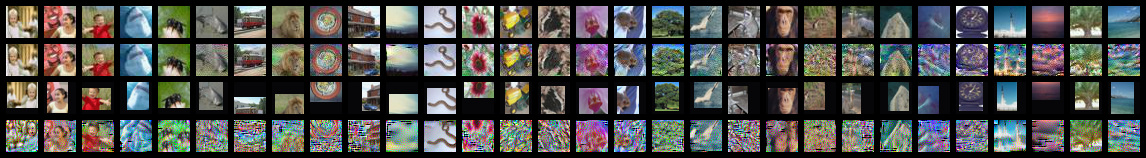

  89   66   38   44   84   36   13   16   32   40   9    87   68   47   8    83   97   58   60   71   94   64   7    75   90   91   14   5    35   57   


In [14]:
from pathlib import Path
# from IPython.display import Image
from IPython.display import display
from PIL import Image
import torch, torchvision
import pandas as pd

cifar100_resnet_normal_dir = '/home/zx/New_atsp/ATSPrivacy-new/benchmark/images/data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed_mode_normal_auglist__rlabel_False_atk_dlg'
cifar100_resnet_hybrid_dir = '/home/zx/New_atsp/ATSPrivacy-new/benchmark/images/data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed_mode_aug_auglist_12-32-35+20-26-23_rlabel_False'

cifar100_covnet_normal_dir = '/home/zx/New_atsp/ATSPrivacy-new/benchmark/images/data_cifar100_arch_ConvNet32_epoch_100_optim_inversed_mode_normal_auglist__rlabel_False_atk_dlg'
cifar100_covnet_hybrid_dir = '/home/zx/New_atsp/ATSPrivacy-new/benchmark/images/data_cifar100_arch_ConvNet32_epoch_100_optim_inversed_mode_aug_auglist_30-45-30+47-22-19_rlabel_False_atk_dlg'

fmnist_resnet_normal_dir = '/home/zx/New_atsp/ATSPrivacy-new/benchmark/images/data_FashionMinist_arch_ResNet20-4_epoch_200_optim_inversed_mode_normal_auglist__rlabel_False_atk_dlg'
fmnist_resnet_hybrid_dir = '/home/zx/New_atsp/ATSPrivacy-new/benchmark/images/data_FashionMinist_arch_ResNet20-4_epoch_200_optim_inversed_mode_aug_auglist_26-0-29+5-25-18_rlabel_False' 

fmnist_covnet_normal_dir = '/home/zx/New_atsp/ATSPrivacy-new/benchmark/images/data_FashionMinist_arch_ConvNet8_epoch_100_optim_inversed_mode_normal_auglist__rlabel_False_atk_dlg'
fmnist_covnet_normal_dir_20000 = '/home/zx/New_atsp/ATSPrivacy-new/benchmark/images/data_FashionMinist_arch_ConvNet8_epoch_100_optim_inversed_mode_normal_auglist__rlabel_False_atk_dlg_iter_20000'
fmnist_covnet_hybrid_dir = '/home/zx/New_atsp/ATSPrivacy-new/benchmark/images/data_FashionMinist_arch_ConvNet8_epoch_100_optim_inversed_mode_aug_auglist_47-10-30+11-29-6_rlabel_False'

albation_privious_dir = '/home/zx/New_atsp/ATSPrivacy-new/benchmark/images/data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed_mode_aug_auglist_3-1-7+43-18-18_rlabel_False'
albation_new_dir = '/home/zx/New_atsp/ATSPrivacy-new/benchmark/images/data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed_mode_aug_auglist_12-32-35+20-26-23_rlabel_False'

def display_hybrid_effect(normal_dir: str, hybrid_dir: str, samples: int=20, strategy: str='normal_psnr-hybrid_psnr_png', ascending: bool=False):
    '''
    display the effectiveness of hybrid policy

    Args:
        normal_dir: reconstructed results of original images
        hybrid_dir: reconstructed results of images with hybrid policy
        samples: display image numbers
        strategy: the method to sort images, including 'normal_psnr', 'hybrid_psnr_jpg', 'hybrid_psnr_png', 'normal_psnr-hybrid_psnr_jpg', 'normal_psnr-hybrid_psnr_png'
        ascending: the order of stragegy, default False
    
    Return:
        imgs_compare: PIL image that show visual comparison of normal an hybrid 
        index_list  : the index of image range in 0~99
        normal_psnr : psnr of normal images, image index in index_list
        hybrid_psnr_png: psnr of hybrid images, image index in index_list

    '''
    def get_suffix(img_dir)-> str:
        suffix_set = {item.suffix for item in Path(img_dir).iterdir()}
        suffix_set.remove('.npy')
        return suffix_set.pop()
    
    normal_psnr = compute_psnr_img(normal_dir)
    # normal_psnr = compute_psnr_attack(normal_dir)

    hybrid_psnr_jpg = compute_psnr_img(hybrid_dir)
    hybrid_psnr_png = compute_psnr_attack(hybrid_dir)[-100:]

    assert samples<= 100 and samples >=0, 'samples must large equal to zero and less equal to 100'
    psnr_comparison = []
    for idx, i in enumerate(normal_psnr):
        psnr_comparison.append([idx, normal_psnr[idx], hybrid_psnr_jpg[idx], hybrid_psnr_png[idx], normal_psnr[idx]-hybrid_psnr_jpg[idx], normal_psnr[idx]-hybrid_psnr_png[idx]])

    data = pd.DataFrame(psnr_comparison, columns=['idx','normal_psnr', 'hybrid_psnr_jpg', 'hybrid_psnr_png', 'normal_psnr-hybrid_psnr_jpg', 'normal_psnr-hybrid_psnr_png'])

    
    data = data.sort_values(by=[strategy], ascending=ascending)
    index_list = data['idx'][:samples].tolist()

    imgs_list = []
    normal_img_suffix, hybrid_img_suffix = get_suffix(normal_dir), get_suffix(hybrid_dir)
    for path in range(4):
        for idx in index_list:
            idx += 1
            if path == 0:
                img_path = Path(normal_dir+'/'+f'ori_{idx}{normal_img_suffix}')
            elif path == 1:
                img_path = Path(normal_dir+'/'+f'rec_{idx}{normal_img_suffix}')
            elif path == 2:
                img_path = Path(hybrid_dir+'/'+f'ori_{idx}{hybrid_img_suffix}')
            elif path == 3:
                img_path = Path(hybrid_dir+'/'+f'rec_{idx}{hybrid_img_suffix}')
            else:
                raise NotImplementedError

            imgs_list.append(torchvision.transforms.ToTensor()(Image.open(img_path)))

    imgs = torch.stack(imgs_list,dim=0)
    imgs_compare = torchvision.transforms.ToPILImage()(torchvision.utils.make_grid(imgs, nrow=samples,padding=6))

    return imgs_compare, index_list, normal_psnr, hybrid_psnr_png

#index_list 0~99
imgs, index_list, normal_psnr, hybrid_psnr_png = display_hybrid_effect(cifar100_covnet_normal_dir, cifar100_covnet_hybrid_dir, samples=30, strategy = 'normal_psnr-hybrid_psnr_png')
display(imgs)
# index from 1 in imgs dir, +1
list2=list(map(lambda x:str.format("{:<5d}",x+1),index_list))
print(' ',''.join(list2))


In [23]:
cifar100_resnet = [69, 14, 87, 91, 36, 43, 57, 61, 38]
cifar100_covnet = [36, 13, 16, 40, 9, 47, 8, 97, 71, 91]

fmnist_resnet = [41, 17, 6, 97, 65, 8, 60, 59, 69]

fminst_covnet = [61, 72, 69, 36, 92, 52, 35, 29,25]
fminst_covnet = [61, 69, 33, 39, 72, 35, 29,25, 3, 60, 36, 52]
fminst_covnet = [39, 24, 29, 35, 70, 22, 25, 48, 32]

previous_vs_new = [1,6,7,15,20,26,58,59,66,72,83,56]


dis_imgs_list = cifar100_covnet
# for i in dis_imgs_list:
#     preffix = "\includegraphics[ width=0.07\linewidth]{./figs/FashionMnist-ConvNet/aug/rec_" + f'{i}.jpg'+'} &'
#     print(preffix)

for idx in dis_imgs_list:
    # idx += 1
    # if normal_psnr[idx-1] < 11:
    print(str.format('{:.2f}dB &',hybrid_psnr_png[idx-1]))
    

8.17dB &
7.05dB &
7.55dB &
7.24dB &
6.90dB &
7.88dB &
7.66dB &
7.17dB &
7.12dB &
7.81dB &


In [13]:
# generate latex table commands
cifar100_resnet = [69, 14, 87, 91, 36, 43, 57, 61, 38]
for i in cifar100_resnet:
    preffix = "\includegraphics[ width=0.07\linewidth]{./figs/cifar100-ResNet/aug/rec_" + f'{i}.jpg'+'} &'
    print(preffix)

\includegraphics[ width=0.07\linewidth]{./figs/cifar100-ResNet/aug/rec_69.jpg} &
\includegraphics[ width=0.07\linewidth]{./figs/cifar100-ResNet/aug/rec_14.jpg} &
\includegraphics[ width=0.07\linewidth]{./figs/cifar100-ResNet/aug/rec_87.jpg} &
\includegraphics[ width=0.07\linewidth]{./figs/cifar100-ResNet/aug/rec_91.jpg} &
\includegraphics[ width=0.07\linewidth]{./figs/cifar100-ResNet/aug/rec_36.jpg} &
\includegraphics[ width=0.07\linewidth]{./figs/cifar100-ResNet/aug/rec_43.jpg} &
\includegraphics[ width=0.07\linewidth]{./figs/cifar100-ResNet/aug/rec_57.jpg} &
\includegraphics[ width=0.07\linewidth]{./figs/cifar100-ResNet/aug/rec_61.jpg} &
\includegraphics[ width=0.07\linewidth]{./figs/cifar100-ResNet/aug/rec_38.jpg} &


In [1]:
import torch
checkpoint = torch.load('/home/zx/New_atsp/ATSPrivacy-new/checkpoints/data_FashionMinist_arch_ResNet20-4_mode_crop_auglist__rlabel_False/0.pt')
model_state_dict = checkpoint['model_state_dict']
torch.save(model_state_dict,'/home/zx/New_atsp/ATSPrivacy-new/checkpoints/tiny_data_FashionMinist_arch_ResNet20-4/100.pth')

### Policy Show

In [11]:

import os, sys
sys.path.insert(0, '../')
import torch
import torchvision
seed=23333
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
import random
random.seed(seed)

import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from PIL import Image
import inversefed
import torchvision.transforms as transforms
import argparse
from autoaugment import SubPolicy
from inversefed.data.data_processing import _build_cifar100, _get_meanstd, _build_imagenet, _build_celeba_gender, _build_celeba_face_align_mlabel
import torch.nn.functional as F
from benchmark.comm import create_model, build_transform, preprocess, create_config
import policy
import copy




def policy_show(policies, samples=10, data='FashionMinist', mode='aug'):
    '''
    Args
    policies: policy list include whole policy want to show
    smaples: the number of smaples for each policy
    data: dataset
    arch & epochs & model: only use to fill the class element, don't need to pass any arguments

    Return
    grid_imgs_trans: PIL image, first line is origin image, other lines are transformed images according to policy list
    imgs_trans: tensor list, length: len(policies+1)*samples
    
    '''

    class general_args:
        def __init__(self) -> None:
            self.rlabel = False
            self.evaluate = False
            self.data = data
            self.mode = mode
            self.aug_list = ''
            self.tiny_data=False

    opt = general_args()
    defs= inversefed.training_strategy('conservative')
    # loss_fn, trainloader, validloader = preprocess(opt, defs,valid=True)

    if opt.data == 'cifar100':
        _,validset_origin = _build_cifar100('~/data/')
    elif opt.data == 'FashionMinist':
        validset_origin =  torchvision.datasets.FashionMNIST('~/data/', train=False, download=True,
                            transform=transforms.Compose([
                                lambda x: transforms.functional.to_grayscale(x, num_output_channels=1),
                                transforms.Resize(32),
                                transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,))
                            ]))
    elif opt.data == 'ImageNet':
        _,validset_origin = _build_imagenet('/home/zx/nfs/server3/data')
    elif opt.data == 'CelebA_Gender':
        _,validset_origin = _build_celeba_gender('/home/zx/nfs/server3/data')
    elif opt.data == 'CelebAFaceAlign_MLabel':
        _,validset_origin = _build_celeba_face_align_mlabel('/home/zx/nfs/server3/data')
        
    validset_origin.transform.transforms = validset_origin.transform.transforms[:-1]

    imgs_trans = []
    for i in range(samples):
        imgs_trans.append(validset_origin[i][0])

  
    show_policies = policies

    from tqdm import tqdm
    for p in tqdm(show_policies):
        from IPython.display import clear_output
        clear_output(wait=True)
        opt.aug_list = p

        loss_fn, trainloader, validloader = preprocess(opt, defs,valid=True)
        validloader.dataset.transform.transforms = validloader.dataset.transform.transforms[:-1]

        for idx in range(samples):
            transformed_img,_ = validloader.dataset[idx]
            imgs_trans.append(transformed_img)

    imgs_trans = torch.stack(imgs_trans,dim=0)

    grid_imgs_trans = transforms.ToPILImage()(torchvision.utils.make_grid(imgs_trans, nrow=samples,padding=6))

    return grid_imgs_trans, imgs_trans

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 5/5 [00:09<00:00,  2.00s/it]

[RandomCrop(size=(32, 32), padding=4), RandomHorizontalFlip(p=0.5), <benchmark.comm.sub_transform object at 0x7f005691bf70>]


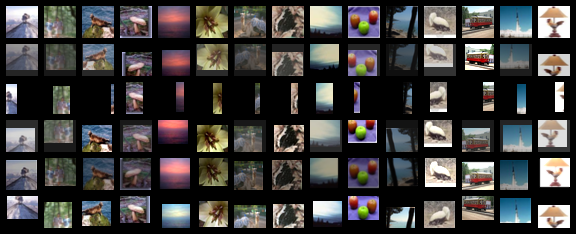

In [13]:
from IPython.display import display
# grid_imgs,_ = policy_show(['14-48-48'],samples=15, data='FashionMinist') #'12-32-35+20-26-23'
# grid_imgs,_ = policy_show(['12', '32', '35'],samples=15, data='cifar100')
grid_imgs,_ = policy_show(['13-43-18', '21-3-16', '42-1-12', '26-14', '7-23-48'],samples=15, data='cifar100')
# grid_imgs,_ = policy_show(['7-45-3', '24-15-8', '37-26-21', '43-40-16', '13-38-18', '6-20-42'],samples=15, data='cifar100')
# grid_imgs,_ = policy_show(['21-13-3','15-48-15', '13-21-43', '7-37-16', '38-15-48', '40-24-18', '26-11-4', '6-20-42'],samples=15, data='cifar100')
# grid_imgs,_ = policy_show(['13-43-18','21-3-16', '38-15-48', '6-20-42', '40-24-18', '26-11-4'],samples=15, data='cifar100')
# grid_imgs,_ = policy_show(['24-3-33', '3-42-32', '43-21-21', '25-15-15', '48-26-13'],samples=10, data='ImageNet')
# grid_imgs,_ = policy_show(['24-3-33', '3-42-32', '43-21-21', '25-15-15', '48-26-13'],samples=10, data='ImageNet')
# grid_imgs,_ = policy_show(['24-3-47', '42-48-29', '21-45-0', '37-26-18', '25-15-15', '34-1-1', '13-40-19'],samples=10, data='CelebA')
# grid_imgs,_ = policy_show(['15-37-34', '3-2-38', '13-40-19', '26-11-4'],samples=10, data='CelebA')
# grid_imgs,_ = policy_show(['15-11-34', '20-3-38', '26-4', '13-19-28'],samples=10, data='CelebA')
# grid_imgs,_ = policy_show(['15-37-34', '3-20-20', '13-30-19', '26-11-4'],samples=10, data='CelebA')

# grid_imgs,_ = policy_show(['21-13-3','7-4-15','5-10-26'],samples=15, data='ImageNet')

# grid_imgs,_ = policy_show(['3-2-38','3-20-20', '2-43-21','14-48-21', '3-2-38+3-20-20+2-43-21+14-48-21'],samples=10, data='CelebA')

# grid_imgs,_ = policy_show(['15-8', '26-13-31', '18-49-11', '38-8-8', '19-34', '1-44'],samples=10, data='CelebAFaceAlign_MLabel')
# 3-2-38+3-20-20

# grid_imgs,_ = policy_show(['11-47-38', '29-21-13', '3-33-18', '7-27-0'],samples=10, data='CelebA')
# grid_imgs,_ = policy_show(['3-11-6', '37-26-21', '45-47-41', '0-40-13'],samples=10, data='CelebA')
display(grid_imgs)



### privacy score with different epochs

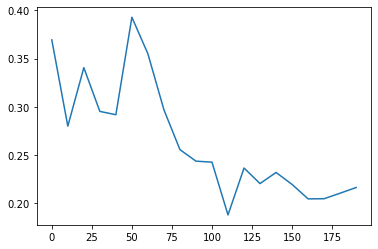

In [5]:
import matplotlib.pyplot as plt
#19-15-45 in crop model
content = [0.3694241201834039, 0.280044649423454, 0.3406334213569759, 0.29533951402985953, 0.2919063292029223, 0.39285209805986077, 0.35496880471555564, 0.2969800457861232, 0.2557412847967119, 0.24381196980078473, 0.24276158996441802, 0.1881289725160902, 0.23667614486211414, 0.22057675739049806, 0.2320951558326133, 0.21971122583204505, 0.2047524089358346, 0.2049044455689114, 0.2106230123853166, 0.2165187256752857]

x = [i for i in range(0,200,10)]
plt.plot(x, content)

## Compute SD penalty to privacy score

In [1]:
#read pri and acc metric per policy single
import numpy as np
import os
from collections import defaultdict
import re
dataset = 'FashionMinist'
def get_metric(dataset='FashionMinist', arch='ResNet20-4', acc_root=None, pri_root=None, bash_path=None):
    # acc_root = f'/home/zx/ATSPrivacy/accuracy/data_{dataset}_arch_{arch}_samples_single'
    # pri_root = f'/home/zx/ATSPrivacy/search/find_transformation_per_cls_cos/data_{dataset}_arch_{arch}_samples_10_single'
    # acc_root = f'/home/zx/ATSPrivacy_new/accuracy/data_{dataset}_arch_{arch}_v1'
    # pri_root = f'/home/zx/ATSPrivacy_new/search/data_{dataset}_arch_{arch}'
    # bash_path = '/home/zx/ATSPrivacy_new/batch_generate_mobilenet.sh'
    def get_all_policies():
        names = []
        # with open('batch_generate_single.sh','r') as f:
        with open(bash_path,'r') as f:
            for line in f.readlines():
                match = re.search('aug_list=((\d+-){0,2}\d+)', line)
                if match is not None:
                    parase = match.group().split('=')[-1]
                    names.append(parase)
        return names

    def load_scores(acc_root, pri_root,names, is_single=False):

        metrics = defaultdict(list)
            
        for name in names:
            if '50' in name or name not in os.listdir(pri_root):
                continue
            acc_path = os.path.join(acc_root, name)
            if not os.path.exists(acc_path):
                print(acc_path)
            else:
                acc_score = np.mean(np.load(acc_path).tolist())

            if isinstance(acc_score, complex):
                continue 
            
            pri_path = os.path.join(pri_root, name)
            if not os.path.exists(pri_path):
                print(pri_path)
            else:
                if is_single:
                    # privacy_score = np.load(os.path.join(pri_root, name)) # shape [num_class,2], each item contain the average pri_score of 10 images
                    # metrics[name] = [np.mean(privacy_score[:,0]), acc_score, np.var(privacy_score[:,0])] # set ddof as default 0
                    privacy_score = np.load(os.path.join(pri_root, name)) # shape [num_class], each item contain the average pri_score of 5 images for MobileNet
                    metrics[name] = [np.mean(privacy_score), acc_score, np.var(privacy_score)] # set ddof as default 0
                else:
                    pri_score = np.mean(np.load(os.path.join(pri_root, name)).tolist())
                    metrics[name] = [pri_score, acc_score]
        return metrics

    names = get_all_policies()
    names = [i+'.npy' for i in names]

    #91个policy 包含50 11个policy 重复 1500-11-91=1398
    metris_single = load_scores(acc_root, pri_root,names, is_single=True)

    # pri_root = f'/home/zx/New_atsp/ATSPrivacy-new/search/data_{dataset}_arch_{arch}'
    # #88个两个function 1398-88=1310
    # metris = load_scores(acc_root, pri_root, metris_single.keys())
    # # # len(metris.keys())

    # for key in metris.keys():
    #     metris[key].append(metris_single[key][2])

    # return metris #{policy_name : [pri_score, acc_score, var(pri_scores)]}
    return metris_single


In [ ]:
# ## Clean the read method
# # file decleration

# #read pri and acc metric per policy single
# import numpy as np
# import os
# from collections import defaultdict
# dataset = 'FashionMinist'
# def get_metric(dataset='FashionMinist', arch='ResNet20-4'):
#     acc_root = f'/home/zx/ATSPrivacy/accuracy/data_{dataset}_arch_{arch}_samples_single'
#     pri_root = f'/home/zx/ATSPrivacy/search/find_transformation_per_cls_cos/data_{dataset}_arch_{arch}_samples_10_single'

#     def get_all_policies():
#         names = []
#         with open('batch_generate_single.sh','r') as f:
#             for line in f.readlines():
#                 match = re.search('aug_list=((\d+-){0,2}\d+)', line)
#                 if match is not None:
#                     parase = match.group().split('=')[-1]
#                     names.append(parase)
#         return names

#     def load_scores(acc_root, pri_root,names, is_single=False):

#         metrics = defaultdict(list)
            
#         for name in names:
#             if '50' in name or name not in os.listdir(pri_root):
#                 continue

#             acc_score = np.mean(np.load(os.path.join(acc_root, name)).tolist())
#             if isinstance(acc_score, complex):
#                 continue 
            
#             if is_single:
#                 privacy_score = np.load(os.path.join(pri_root, name)) # shape [num_class,2], each item contain the average pri_score of 10 images
#                 metrics[name] = [np.mean(privacy_score), acc_score, np.var(privacy_score)] # set ddof as default 0
#             else:
#                 pri_score = np.mean(np.load(os.path.join(pri_root, name)).tolist())
#                 metrics[name] = [pri_score, acc_score]
#         return metrics

#     names = get_all_policies()
#     names = [i+'.npy' for i in names]

#     #91个policy 包含50 11个policy 重复 1500-11-91=1398
#     metris_single = load_scores(acc_root, pri_root,names, is_single=True)

#     # pri_root = f'/home/zx/New_atsp/ATSPrivacy-new/search/data_{dataset}_arch_{arch}'
#     # #88个两个function 1398-88=1310
#     # metris = load_scores(acc_root, pri_root, metris_single.keys())
#     # # # len(metris.keys())

#     # for key in metris.keys():
#     #     metris[key].append(metris_single[key][2])

#     # return metris #{policy_name : [pri_score, acc_score, var(pri_scores)]}
#     return metris_single


### FashionMnist

In [2]:
def normalize(score):
    range = np.max(score)-np.min(score)
    score = (score-np.min(score))/range
    return score

metris = get_metric(dataset='FashionMinist',arch='ResNet20-4')
policies = list(metris.keys())
privacy_score_list,  sd_list = [metris[k][0] for k in policies], [metris[k][2] for k in policies]
privacy_score_list, sd_list = normalize(privacy_score_list), normalize(sd_list)

alpha = 0.7
belta = 1-alpha
new_privacy_score_list = privacy_score_list*alpha+sd_list*belta
indices = np.argsort(new_privacy_score_list)

privacy_name_score={}
low_privacy_score_list = []
# for i,idx in enumerate(indices):
#     if metris[policies[idx]][1] > -12 and metris[policies[idx]][0]>0.3:
#         print(policies[idx],' ', new_privacy_score_list[idx],metris[policies[idx]])
#         # low_privacy_score_list.append(policies[idx][:-4] if policies[idx].endswith('.npy') else policies[idx])
#         privacy_name_score[policies[idx][:-4]] = metris[policies[idx]][0]

repeat = []
draw_distribution = []
for i,idx in enumerate(indices):
    if metris[policies[idx]][1] > -12 and metris[policies[idx]][0]>0.3:
        trans = policies[idx][:-4].split('-') # 3-1-7
        # draw_distribution.append([metris[policies[idx]][0], metris[policies[idx]][1]])
        is_repeat = False
        for i in trans:
             if i in repeat:
                 is_repeat = True
        if not is_repeat:
            repeat.extend(trans)
            # print(repeat)
            print(policies[idx],' ', new_privacy_score_list[idx],metris[policies[idx]])
            # low_privacy_score_list.append(policies[idx][:-4] if policies[idx].endswith('.npy') else policies[idx])
            privacy_name_score[policies[idx][:-4]] = metris[policies[idx]][0]
            




FileNotFoundError: [Errno 2] No such file or directory: '/home/zx/ATSPrivacy/search/find_transformation_per_cls_cos/data_FashionMinist_arch_ResNet20-4_samples_10_single'

In [16]:
def policy_combine(policies_list):
    return '+'.join(policies_list)
policies_list = list(privacy_name_score.keys()) 
for idx, p in enumerate(policies_list):
    # cmd_single = f'CUDA_VISIBLE_DEVICES=0 python benchmark/cifar100_train.py --data=FashionMinist --arch=ConvNet8 --epochs=100 --aug_list={p} --mode=aug &'
    # cmd_hybrid = f'CUDA_VISIBLE_DEVICES=0 python benchmark/cifar100_train.py --data=FashionMinist --arch=ConvNet8 --epochs=100 --aug_list={policy_combine(policies_list[:idx+1])} --mode=aug &'
    cmd_hybrid = f'CUDA_VISIBLE_DEVICES=0 python benchmark/cifar100_attack.py --data=FashionMinist --arch=ConvNet8 --epochs=100 --aug_list={policy_combine(policies_list[:idx+1])} --mode=aug --optim=inversed --attack=dlg &'
    # print(cmd_single)
    print(cmd_hybrid)


CUDA_VISIBLE_DEVICES=0 python benchmark/cifar100_attack.py --data=FashionMinist --arch=ConvNet8 --epochs=100 --aug_list=11-29-6 --mode=aug --optim=inversed --attack=dlg &
CUDA_VISIBLE_DEVICES=0 python benchmark/cifar100_attack.py --data=FashionMinist --arch=ConvNet8 --epochs=100 --aug_list=11-29-6+47-10-30 --mode=aug --optim=inversed --attack=dlg &
CUDA_VISIBLE_DEVICES=0 python benchmark/cifar100_attack.py --data=FashionMinist --arch=ConvNet8 --epochs=100 --aug_list=11-29-6+47-10-30+31-2-12 --mode=aug --optim=inversed --attack=dlg &
CUDA_VISIBLE_DEVICES=0 python benchmark/cifar100_attack.py --data=FashionMinist --arch=ConvNet8 --epochs=100 --aug_list=11-29-6+47-10-30+31-2-12+0-27-7 --mode=aug --optim=inversed --attack=dlg &
CUDA_VISIBLE_DEVICES=0 python benchmark/cifar100_attack.py --data=FashionMinist --arch=ConvNet8 --epochs=100 --aug_list=11-29-6+47-10-30+31-2-12+0-27-7+13-19-28 --mode=aug --optim=inversed --attack=dlg &
CUDA_VISIBLE_DEVICES=0 python benchmark/cifar100_attack.py --d

### Cifar100

In [19]:
def normalize(score):
    range = np.max(score)-np.min(score)
    score = (score-np.min(score))/range
    return score
    
    

acc_root = f'/home/zx/nfs/server3/ATSPrivacy/accuracy/data_cifar100_arch_ResNet20-4'
pri_root = f'/home/zx/nfs/server3/ATSPrivacy/search/data_cifar100_arch_ResNet20-4'
bash_path = '/home/zx/nfs/server3/ATSPrivacy/batch_ResNet20_cifar100_single.sh'

metris = get_metric(dataset='cifar100',arch='ResNet20-4', acc_root=acc_root, pri_root=pri_root, bash_path=bash_path)
# metris = get_metric(dataset='cifar100',arch='MobileNet')
policies = list(metris.keys())
privacy_score_list = [metris[k][0] for k in policies]
acc_score_list = [metris[k][1] for k in policies]
sd_list = [metris[k][2] for k in policies]

privacy_score_list = normalize(privacy_score_list)
sd_list = normalize(sd_list)

alpha = 0.7
belta = 1-alpha
new_privacy_score_list = privacy_score_list*alpha+sd_list*belta

# for i, p in enumerate(policies):
#     metris[p][0] = new_privacy_score_list[i]

indices = np.argsort(new_privacy_score_list)

draw_distribution = []
privacy_name_score = {}
# for i,idx in enumerate(indices):
#     if metris[policies[idx]][1] >-75 and metris[policies[idx]][0]>0:
#         print(policies[idx],' ', new_privacy_score_list[idx],metris[policies[idx]])
#         privacy_name_score[policies[idx][:-4]] = metris[policies[idx]][0]
#         # draw_distribution.append([new_privacy_score_list[idx], metris[policies[idx]][1]])
#         draw_distribution.append([metris[policies[idx]][0], metris[policies[idx]][1]])

# repeat = ['6', '20', '42']
# execule = ['7-45-3', '24-15-48', '3-40-5', '13-21-43']


# repeat = ['13', '43', '18', '21', '3', '16']
# exclude = ['13-43-18', '21-3-16']
repeat, exclude = [], []
draw_distribution = []
for i,idx in enumerate(indices):
    if policies[idx][:-4] in exclude:
        continue
    if metris[policies[idx]][1] > -1000 and metris[policies[idx]][0]>0:
        trans = policies[idx][:-4].split('-') # ['3', '1', '7']
        # draw_distribution.append([metris[policies[idx]][0], metris[policies[idx]][1]])
        is_repeat = False
        for i in trans:
                if i in repeat:
                    is_repeat = True
        if not is_repeat:
            repeat.extend(trans)
            # print(repeat)
            print(policies[idx],' ', new_privacy_score_list[idx],metris[policies[idx]])
            # low_privacy_score_list.append(policies[idx][:-4] if policies[idx].endswith('.npy') else policies[idx])
            privacy_name_score[policies[idx][:-4]] = metris[policies[idx]][0]
# acc_score_list.sort()
# acc_score_list[int(0.25*len(acc_score_list)):]

3.npy   0.0 [0.2724323445008812, -131.23833259905172, 0.0075080802989933625]
24.npy   0.298935365728927 [0.3213538878967838, -111.02779376863035, 0.01195731134756498]
43.npy   0.3050582780500149 [0.32656477199488504, -108.64790910426632, 0.011278380844561519]
15.npy   0.3144219663919994 [0.31257496623282277, -112.85254738169162, 0.014257722560018872]
42.npy   0.33518868255441603 [0.3345225787803996, -108.05661730044605, 0.011173023033955145]
48.npy   0.33518868454044937 [0.3345225789691452, -108.05661727965094, 0.011173023088447422]
14.npy   0.3632954621406709 [0.3356769587705297, -106.68555730402166, 0.01222172492919069]
26.npy   0.3688161782698028 [0.335089909984637, -108.37618578643335, 0.012576603417572085]
25.npy   0.3699768533377078 [0.336443412990513, -106.67056604502379, 0.012380991670034962]
19.npy   0.3775711366796324 [0.3370935945068107, -106.67211821213985, 0.012602453081206255]
7.npy   0.3845936262255331 [0.3404034746725448, -107.11387885296699, 0.012311658865966213]
18.np

In [18]:

acc_score_list.sort()
# acc_score_list[int(0.25*len(acc_score_list)):]
acc_score_list

[-131.23833259905172,
 -112.85254738169162,
 -111.33851959658666,
 -111.02779376863035,
 -109.0690083153631,
 -108.64790910426632,
 -108.5289022348067,
 -108.37618578643335,
 -108.05661730044605,
 -108.05661727965094,
 -107.7546610287142,
 -107.22698603793808,
 -107.22698600019037,
 -107.22698597212396,
 -107.11387885296699,
 -107.11368204375432,
 -107.03455167649891,
 -106.95041134275291,
 -106.93972507480385,
 -106.72670891919367,
 -106.72670890820534,
 -106.72670890690551,
 -106.72670888008557,
 -106.72670887722947,
 -106.72670887652707,
 -106.7267088713352,
 -106.69317980736407,
 -106.68555730402166,
 -106.68428341023566,
 -106.68428337758557,
 -106.67211821213985,
 -106.67185002684555,
 -106.67056604502379,
 -106.66607136762522,
 -106.65899111184012,
 -106.6581442313756,
 -106.65502767800983,
 -106.65502766451479,
 -106.65347792066602,
 -106.64336834502583,
 -106.07182867639945,
 -106.07182866531434,
 -106.07182866505664,
 -106.0718286544613,
 -106.07182863098697,
 -106.0718286160

### ImageNet

In [4]:
acc_root = '/home/zx/nfs/server3/ATSPrivacy/accuracy/data_ImageNet_arch_ResNet20-4'
pri_root = '/home/zx/nfs/server3/ATSPrivacy/search/data_ImageNet_arch_ResNet20-4' 
bash_path = '/home/zx/nfs/server3/ATSPrivacy/batch_ResNet_ImageNet.sh'

def normalize(score):
    range = np.max(score)-np.min(score)
    score = (score-np.min(score))/range
    return score

# metris = get_metric(dataset='cifar100',arch='ResNet20-4')
metris = get_metric(dataset='ImageNet',arch='ResNet20-4', acc_root=acc_root, pri_root=pri_root, bash_path=bash_path)
policies = list(metris.keys())
privacy_score_list = [metris[k][0] for k in policies]
acc_score_list = [metris[k][1] for k in policies]
sd_list = [metris[k][2] for k in policies]

privacy_score_list = normalize(privacy_score_list)
sd_list = normalize(sd_list)

alpha = 0.7
belta = 1-alpha
new_privacy_score_list = privacy_score_list*alpha+sd_list*belta

# for i, p in enumerate(policies):
#     metris[p][0] = new_privacy_score_list[i]

indices = np.argsort(new_privacy_score_list)

draw_distribution = []
privacy_name_score = {}
# for i,idx in enumerate(indices):
#     if metris[policies[idx]][1] >-75 and metris[policies[idx]][0]>0:
#         print(policies[idx],' ', new_privacy_score_list[idx],metris[policies[idx]])
#         privacy_name_score[policies[idx][:-4]] = metris[policies[idx]][0]
#         # draw_distribution.append([new_privacy_score_list[idx], metris[policies[idx]][1]])
#         draw_distribution.append([metris[policies[idx]][0], metris[policies[idx]][1]])

# repeat = ['6', '20', '42']
# execule = ['7-45-3', '24-15-48', '3-40-5', '13-21-43']
repeat, execule = [], ['24-3-33']
draw_distribution = []
for i,idx in enumerate(indices):
    if policies[idx][:-4] in execule:
        continue
    if metris[policies[idx]][1] > -100 and metris[policies[idx]][0]>0:
        trans = policies[idx][:-4].split('-') # ['3', '1', '7']
        # draw_distribution.append([metris[policies[idx]][0], metris[policies[idx]][1]])
        is_repeat = False
        for i in trans:
                if i in repeat:
                    is_repeat = True
        if not is_repeat:
            repeat.extend(trans)
            # print(repeat)
            print(policies[idx],' ', new_privacy_score_list[idx],metris[policies[idx]])
            # low_privacy_score_list.append(policies[idx][:-4] if policies[idx].endswith('.npy') else policies[idx])
            privacy_name_score[policies[idx][:-4]] = metris[policies[idx]][0]
# acc_score_list.sort()
# acc_score_list[int(0.25*len(acc_score_list)):]

3-42-32.npy   0.05385163468241928 [0.3674747705575594, -2.4581710056729142, 0.0028219188972833332]
43-21-21.npy   0.20500876680742267 [0.41335791895614393, -2.1918253679323176, 0.004424780532846639]
25-15-15.npy   0.21611532922534674 [0.44183368824927655, -2.029277092699715, 0.003118550812103342]
48-26-13.npy   0.3084946643070059 [0.4717267648047136, -2.0362583212966268, 0.003993101916459016]
24-38-37.npy   0.40596337398922333 [0.49463089546956096, -2.06586569256042, 0.005405685294501682]
49-7-11.npy   0.4640051904439962 [0.5106297599346581, -2.017089241487317, 0.00611302059215834]
27-18.npy   0.47297125123646516 [0.5077204185637948, -2.0078448377246767, 0.006527501954124867]
34-1-1.npy   0.47587548496713217 [0.5002104426933387, -2.0102914965089376, 0.007034293624985603]
41-10-31.npy   0.4796865660868689 [0.5158936931402245, -2.0142934954077694, 0.006250721400982687]
8-20-4.npy   0.4911621105443977 [0.5214777011605732, -2.0076088164839803, 0.006253251698624147]
19-23-14.npy   0.4964642

### CelebA

In [18]:

acc_root = '/home/zx/nfs/server3/ATSPrivacy/accuracy/data_CelebA_arch_ResNet18_tv'
pri_root = '/home/zx/nfs/server3/ATSPrivacy/search/data_CelebA_arch_ResNet18_tv' 
bash_path = '/home/zx/nfs/server3/ATSPrivacy/batch_ResNet_CelebA.sh'

def normalize(score):
    range = np.max(score)-np.min(score)
    score = (score-np.min(score))/range
    return score

# metris = get_metric(dataset='cifar100',arch='ResNet20-4')
metris = get_metric(dataset='CelebA',arch='ResNet18_tv', acc_root=acc_root, pri_root=pri_root, bash_path=bash_path)
policies = list(metris.keys())
privacy_score_list = [metris[k][0] for k in policies]
acc_score_list = [metris[k][1] for k in policies]
sd_list = [metris[k][2] for k in policies]

privacy_score_list = normalize(privacy_score_list)
sd_list = normalize(sd_list)

alpha = 0.7
belta = 1-alpha
new_privacy_score_list = privacy_score_list*alpha+sd_list*belta

# for i, p in enumerate(policies):
#     metris[p][0] = new_privacy_score_list[i]

indices = np.argsort(new_privacy_score_list)

draw_distribution = []
privacy_name_score = {}
# for i,idx in enumerate(indices):
#     if metris[policies[idx]][1] >-75 and metris[policies[idx]][0]>0:
#         print(policies[idx],' ', new_privacy_score_list[idx],metris[policies[idx]])
#         privacy_name_score[policies[idx][:-4]] = metris[policies[idx]][0]
#         # draw_distribution.append([new_privacy_score_list[idx], metris[policies[idx]][1]])
#         draw_distribution.append([metris[policies[idx]][0], metris[policies[idx]][1]])

# repeat = ['6', '20', '42']
# execule = ['7-45-3', '24-15-48', '3-40-5', '13-21-43']
repeat, execule = [], ['3-2-38', '20-3-38', '3-14-39']
draw_distribution = []
for i,idx in enumerate(indices):
    if policies[idx][:-4] in execule:
        continue
    if metris[policies[idx]][1] > -100 and metris[policies[idx]][0]>0:
        trans = policies[idx][:-4].split('-') # ['3', '1', '7']
        # draw_distribution.append([metris[policies[idx]][0], metris[policies[idx]][1]])
        is_repeat = False
        for i in trans:
                if i in repeat:
                    is_repeat = True
        if not is_repeat:
            repeat.extend(trans)
            # print(repeat)
            print(policies[idx],' ', new_privacy_score_list[idx],metris[policies[idx]])
            # low_privacy_score_list.append(policies[idx][:-4] if policies[idx].endswith('.npy') else policies[idx])
            privacy_name_score[policies[idx][:-4]] = metris[policies[idx]][0]
# acc_score_list.sort()
# acc_score_list[int(0.25*len(acc_score_list)):]

15-37-34.npy   0.013646275138545163 [0.5281089362963953, -2.0016248844739346, 1.109792937736951e-08]
3-20-20.npy   0.03568243069109851 [0.5300738436740541, -2.0543166183936097, 9.924723304295493e-06]
13-40-19.npy   0.08744731219181939 [0.5336278154864029, -2.0004052073972467, 6.388320196188561e-05]
26-11-4.npy   0.1240996958812175 [0.5298631803196664, -2.000447499078697, 0.0002835242471554524]
18-9-0.npy   0.14224456931871768 [0.5415568338951682, -2.0004317739217767, 6.379178627501343e-07]
43-21-21.npy   0.1485101207767774 [0.5419788431386554, -2.0056855361485035, 7.404653589329637e-06]
17-35-47.npy   0.17073858751091098 [0.5445597070026713, -2.0003479088441467, 1.0748943899677394e-07]
33-22-29.npy   0.17076800727162525 [0.5445627998497626, -2.0003479088617677, 1.071609197389013e-07]
2-10-5.npy   0.18593497739546128 [0.545788442619874, -2.0008728599900896, 1.0592005383845336e-05]
44-7-38.npy   0.22843756919725264 [0.5501989648736372, -2.0005418712913916, 1.1784117164902801e-05]
32-16-4

In [5]:
# acc_score_list
for i in acc_score_list:
    print(i)
# print(privacy_score_list)

-2.0114945963018735
-2.023075442477004
-2.2610132313036946
-2.009334558864676
-2.0219844273070926
-2.038952380752479
-2.065016136212018
-2.0116918057743725
-2.019786084213304
-2.0440312573739177
-2.0070650426066514
-2.0111286996705102
-2.007546978101468
-2.0981244504519942
-2.005785749539363
-2.023968315691366
-2.070483872114758
-2.023075441537475
-2.0264917398280167
-2.0053175832959886
-2.0056241841463938
-2.058998646524236
-2.0431937128066098
-2.0598213802706513
-2.0271662995104984
-2.0406280355464803
-2.0105031357766596
-2.0268948516450562
-2.0184075065314913
-2.0191799556630214
-2.0820619941140484
-2.0111286990190465
-2.083024576581495
-2.083188104444301
-2.0194582363221407
-2.009767751486967
-2.010832949639685
-2.0257895026356634
-2.0142261213468937
-2.045629428515171
-2.0219844274785297
-2.022586836856126
-2.041755979866998
-2.019290725977874
-2.010179359561571
-2.215003411745269
-2.0176170831315687
-2.009681944837805
-2.011102484093028
-2.038795681627857
-2.0383613504142213
-2.0

In [50]:
import matplotlib.pyplot as plt 
from collections import defaultdict
import numpy as np

# draw_distribution_ = draw_distribution[:500]


def read_acc_folder(file_dir, acc_dict):
    for file in file_dir.iterdir():
        acc_dict[file.name.split('.')[0]] = np.mean(np.load(str(file), allow_pickle=True))

def read_pri_folder(file_dir, pri_dict):
    for file in file_dir.iterdir():
        content = np.load(str(file), allow_pickle=True).tolist()
        # print(content)
        # content = [d['test_psnr'] for d in content]

        # pri_dict[file.name.split('.')[0]] = np.mean(content)
        pri_dict[file.name.split('.')[0]] = content

# sections = [500,700,-1]
# for i in sections:
#     draw(draw_distribution[:i])
# # len(draw_distribution)

from pathlib import Path
pri_dir = Path('/home/zx/New_atsp/ATSPrivacy-new/search/data_cifar100_arch_ResNet20-4')

acc_dir_1 = Path('/home/zx/ATSPrivacy/accuracy/data_cifar100_arch_ResNet20-4_samples_single')
acc_dir_2 = Path('/home/zx/ATSPrivacy/accuracy/data_cifar100_arch_ResNet20-4_samples_single_distribution')
# acc_dir_2 = Path('/home/zx/New_atsp/ATSPrivacy-new/accuracy/data_cifar100_arch_ResNet20-4_v1')

acc_dict = defaultdict(int)
# acc_dict_fix = defaultdict(int)
pri_dict = defaultdict(int)
read_acc_folder(acc_dir_1, acc_dict)
read_acc_folder(acc_dir_2, acc_dict)
read_pri_folder(pri_dir, pri_dict)

# read_acc_folder(Path('/home/zx/ATSPrivacy/accuracy/data_cifar100_arch_ResNet20-4_samples_single_distribution'), acc_dict_fix)

## draw pri-acc distribution

In [ ]:
import random
def get_min_max(number):
    return np.min(number), np.max(number)

def draw(distribution):
    x, y = [p[0] for p in distribution], [p[1] for p in distribution]
    plt.figure(dpi=600)
    plt.scatter(x,y)
    # plt.xticks(np.linspace(0.15, 0.4, 6))
    plt.yticks(np.linspace(-85, -60, 6))
    plt.xlabel('$S_{pri}$', fontsize=24)
    plt.ylabel('$S_{acc}$', fontsize=24)
    plt.savefig(f'distribution_{len(x)}',dpi=600)


def compute_new_pri_score(pri_score_list, label_dict):
    pri_label_score_list = []
    for idx_list in label_dict.values():

        pri_label_score_list.append(np.mean([pri_score_list[idx] for idx in idx_list]))

    mean = np.mean(pri_label_score_list)
    var = np.var(pri_label_score_list)

    return mean, var

mean_list, var_list = [], []
dict_keys = []
for key in pri_dict.keys():
    if acc_dict[key] == 0:
        continue
    
    dict_keys.append(key)
    # print(type(pri_dict[key]), key)
    mean, var = compute_new_pri_score(pri_dict[key], labels)
    mean_list.append(mean)
    var_list.append(var)

mean_list = normalize(mean_list)
var_list = normalize(var_list)

new_privacy_score_list = 0.7*mean_list + 0.3*var_list
# mean_list.sort()
# print(mean_list, len(mean_list))

dis = []

for i, key in enumerate( dict_keys):
    if acc_dict[key] != 0 and acc_dict[key] > -85:
        dis.append((new_privacy_score_list[i], acc_dict[key]))

# dis
# pri_list = [ tup[0] for tup in dis]
sections = [500,1500,3000]
for i in sections:
    random.shuffle(dis)
    draw(dis[:i])
    pri_list = [ tup[0] for tup in dis[:i]]
    print(get_min_max(pri_list))


Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 1/1 [00:01<00:00,  1.50s/it]

[<function build_transform.<locals>.<lambda> at 0x7f48f52ab3a0>, <function build_transform.<locals>.<lambda> at 0x7f48f52ab820>, Resize(size=32, interpolation=bilinear)]
[<function build_transform.<locals>.<lambda> at 0x7f48f52aba60>, RandomCrop(size=(32, 32), padding=4), RandomHorizontalFlip(p=0.5), <benchmark.comm.sub_transform object at 0x7f48f52afb50>, <function build_transform.<locals>.<lambda> at 0x7f48f52abaf0>, Resize(size=32, interpolation=bilinear)]


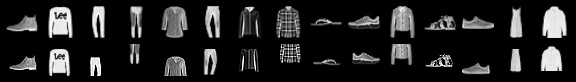

## Policy Area Bound

In [4]:



from PIL import Image
import torchvision
import torch, random
# low_privacy_score_list=['47-10-30','11-29-6']
# grid_imgs_trans, imgs_trans = policy_show(low_privacy_score_list,samples=100, data='cifar100')
low_privacy_score_list = [*privacy_name_score]
random.shuffle(low_privacy_score_list)

grid_imgs_trans, imgs_trans = policy_show(low_privacy_score_list[:200],samples=100, data='cifar100')
# grid_imgs_trans

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 200/200 [08:58<00:00,  2.69s/it]

[RandomCrop(size=(32, 32), padding=4), RandomHorizontalFlip(p=0.5), <benchmark.comm.sub_transform object at 0x7f6c040e3a00>]


In [9]:
torch.save(imgs_trans, 'ResNet_cifar100_random_200_imgs')

In [19]:
def get_transforms_info(imgs_trans, samples, metric='psnr'):

    def psnr(img_batch, ref_batch, batched=True, factor=1.0):
        """Standard PSNR."""
        def get_psnr(img_in, img_ref):
            mse = ((img_in - img_ref)**2).mean()
            if mse > 0 and torch.isfinite(mse):
                return (10 * torch.log10(factor**2 / mse))
            elif not torch.isfinite(mse):
                return img_batch.new_tensor(float('nan'))
            else:
                return img_batch.new_tensor(float('inf'))

        if not batched:
            psnr = get_psnr(img_batch.detach(), ref_batch)
        else:
            [B, C, m, n] = img_batch.shape
            psnrs = []
            for sample in range(B):
                psnrs.append(get_psnr(img_batch.detach()[sample, :, :, :], ref_batch[sample, :, :, :]))
            psnr = torch.stack(psnrs, dim=0).mean()

        return psnr.item()

    def img_ratio(img_batch, ref_batch, batched=True):
        ''' get non-zero ratio between origin and transformed image'''
        def get_ratio(img_in, img_ref):
            ori = torch.count_nonzero(img_in)
            trans = torch.count_nonzero(img_ref)
            
            return torch.div(trans, ori)

        if not batched:
            ratio = get_ratio(img_batch.detach(), ref_batch)
        else:
            [B, C, m, n] = img_batch.shape
            ratio = []
            for sample in range(B):
                ratio.append(get_ratio(img_batch.detach()[sample, :, :, :], ref_batch[sample, :, :, :]))
            ratio = torch.stack(ratio, dim=0).mean()

        return ratio.item()

    def similarity_measures(img_batch, ref_batch, batched=True, method='fsim'):
        
        import image_similarity_measures
        from image_similarity_measures.quality_metrics import fsim, issm, rmse, sam, sre, ssim, uiq
        methods = {'fsim':fsim, 'issm':issm, 'rmse':rmse, 'sam':sam, 'sre':sre, 'ssim':ssim, 'uiq':uiq }

        def get_similarity(img_in, img_ref):
            return methods[method](img_in.permute(1,2,0).numpy(), img_ref.permute(1,2,0).numpy())
        
        if not batched:
            sim = get_similarity(img_batch.detach(), ref_batch)
        else:
            [B, C, m, n] = img_batch.shape
            sim_list = []
            for sample in range(B):
                sim_list.append(get_similarity(img_batch.detach()[sample, :, :, :], ref_batch[sample, :, :, :]))

            sim_list = np.array(sim_list)
            # print(fsim_list)
            sim_list = sim_list[~np.isnan(sim_list)]
            # print(fsim_list)
            sim = np.mean(sim_list)
        return sim

    assert imgs_trans.shape[0] % samples == 0, "error img_trans or wrong number samples"

    def LPIPS(img_batch, ref_batch):
        import lpips
        img_batch, ref_batch = torch.nn.functional.normalize(img_batch),torch.nn.functional.normalize(ref_batch)
        sim_list = lpips.LPIPS(net='vgg')(img_batch, ref_batch).detach().numpy()
        return np.mean(sim_list), np.var(sim_list)

    ori_imgs = imgs_trans[:samples]
    from tqdm import tqdm


    result_list = []
    if metric == 'psnr':
        for i in range(1, imgs_trans.shape[0]//samples): 
            result_list.append(psnr(ori_imgs,imgs_trans[i*samples:(i+1)*samples], batched=True))
    elif metric == 'img_ratio':
        for i in range(1, imgs_trans.shape[0]//samples): 
            result_list.append(img_ratio(ori_imgs,imgs_trans[i*samples:(i+1)*samples], batched=True))
    elif metric == 'lpips':
        for i in range(1, imgs_trans.shape[0]//samples): 
            result_list.append(LPIPS(ori_imgs,imgs_trans[i*samples:(i+1)*samples]))
    elif metric in ['fsim','issm','rmse','sam','sre','ssim','uiq']:
        for i in tqdm(range(1, imgs_trans.shape[0]//samples)): 
            result_list.append(similarity_measures(ori_imgs,imgs_trans[i*samples:(i+1)*samples], batched=True, method=metric))
    else:
        raise NotImplementedError
    return result_list

# psnr_list = get_transforms_info(imgs_trans, samples=100, metric='psnr')
# ratio_list = get_transforms_info(imgs_trans, samples=100, metric='img_ratio')
# fsim_list = get_transforms_info(imgs_trans, samples=100, metric='fsim')
# for idx, i in enumerate(psnr_list):
#     if ratio_list[idx] > 0:
#         print(low_privacy_score_list[idx], privacy_name_score[low_privacy_score_list[idx]], psnr_list[idx], ratio_list[idx], fsim_list[idx])
#         privacy_vs_ratio.append([privacy_name_score[low_privacy_score_list[idx]], ratio_list[idx],fsim_list[idx]])
    

Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/zx/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

Loading model from: /home/zx/miniconda3/envs/torch1.8.1/lib/python3.8/site-packages/lpips/weights/v0.1/vgg.pth
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /home/zx/miniconda3/envs/torch1.8.1/lib/python3.8/site-packages/lpips/weights/v0.1/vgg.pth
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /home/zx/miniconda3/envs/torch1.8.1/lib/python3.8/site-packages/lpips/weights/v0.1/vgg.pth
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /home/zx/miniconda3/envs/torch1.8.1/lib/python3.8/site-packages/lpips/weights/v0.1/vgg.pth
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /home/zx/miniconda3/envs/torch1.8.1/lib/python3.8/site-packages/lpips/weights/v0.1/vgg.pth
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /home/zx/miniconda3/envs/torch1.8.1/lib/python3.8/site-packages/lpips/

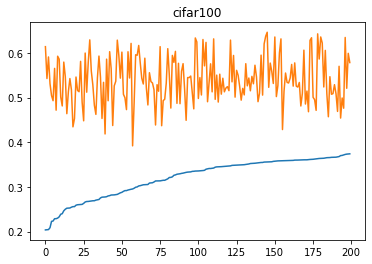

In [15]:
import matplotlib.pyplot as plt

from PIL import Image
import torchvision
import torch, random
# low_privacy_score_list=['47-10-30','11-29-6']
# grid_imgs_trans, imgs_trans = policy_show(low_privacy_score_list,samples=100, data='cifar100')
low_privacy_score_list = [*privacy_name_score]
random.shuffle(low_privacy_score_list)
dataset='cifar100'; arch = 'ResNet'
# grid_imgs_trans, imgs_trans = policy_show(low_privacy_score_list[:200],samples=100, data=dataset)
imgs_trans = torch.load('ResNet_cifar100_random_200_imgs')


# psnr_list = get_transforms_info(imgs_trans, samples=100, metric='psnr')
# ratio_list = get_transforms_info(imgs_trans, samples=100, metric='img_ratio')
# fsim_list = get_transforms_info(imgs_trans, samples=100, metric='fsim')


metrics = ['lpips']
for m in metrics:
    sim_list = get_transforms_info(imgs_trans, samples=100, metric=m)

    privacy_vs_sim = []


    for idx, i in enumerate(sim_list):
        # if ratio_list[idx] > 0:
        # print(low_privacy_score_list[idx], privacy_name_score[low_privacy_score_list[idx]], psnr_list[idx], ratio_list[idx], fsim_list[idx])
        # privacy_vs_ratio.append([privacy_name_score[low_privacy_score_list[idx]], ratio_list[idx],fsim_list[idx]])
        privacy_vs_sim.append([privacy_name_score[low_privacy_score_list[idx]], sim_list[idx]])


    privacy_vs_sim.sort(key=lambda x: x[0])

    plt.figure()
    plt.plot(privacy_vs_sim)
    plt.title(dataset)
    plt.savefig(arch + '__' + dataset + '__' + m)
    # plt.save()

## image construction Comparison

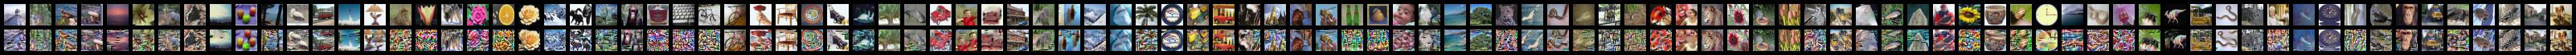

In [14]:
from pathlib import Path
# from IPython.display import Image
from IPython.display import display
from PIL import Image
import torch, torchvision
# comparison_polices = ['3-1-7','43-18-18','3-1-7+43-18-18','12-32-35','20-26-23','12-32-35+20-26-23']
# comparison_polices = ['3-1-7+43-18-18','12-32-35+20-26-23']
# comparison_polices = ['19-15-45','2-43-21','19-15-45+2-43-21','26-0-29','5-25-18','26-0-29+5-25-18']
# comparison_polices = ['43-18-18']
comparison_polices = ['']
imgs_dir = '/home/zx/New_atsp/ATSPrivacy-new/benchmark/images/'
arch='ResNet20-4'
epoch='200'
dataset='cifar100'
mode='normal' #aug
suffix='_atk_dlg' # _atk_dlg


    
def atoi(text):
        return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    import re
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

imgs_list = []
for policy_name in comparison_polices:
    ori_list=[]
    rec_list=[]
    
    policy_img_dir=imgs_dir+f'data_{dataset}_arch_{arch}_epoch_{epoch}_optim_inversed_mode_{mode}_auglist_{policy_name}_rlabel_False{suffix}'
    for name in Path(policy_img_dir).glob('ori*'):
        ori_list.append(name.name)
    
    for name in Path(policy_img_dir).glob('rec*'):
        rec_list.append(name.name)
    
    ori_list.sort(key=natural_keys)
    rec_list.sort(key=natural_keys)

    ori_list.extend(rec_list)

    

    # for name in ori_list:
    #     img_path = Path(policy_img_dir+'/'+name)
    #     ori_imgs.append(torchvision.transforms.ToTensor()(Image.open(img_path)))
    
    for name in ori_list:
        img_path = Path(policy_img_dir+'/'+name)
        imgs_list.append(torchvision.transforms.ToTensor()(Image.open(img_path)))
  
    imgs = torch.stack(imgs_list,dim=0)
    # rec_imgs = torch.stack(rec_imgs,dim=0)

    imgs_trans = torchvision.transforms.ToPILImage()(torchvision.utils.make_grid(imgs, nrow=100,padding=6))
    # rec_imgs_trans = transforms.ToPILImage()(torchvision.utils.make_grid(rec_imgs, nrow=100,padding=6))

    display(imgs_trans)
    


In [ ]:
test = load_psnr()
# for policy_name in comparison_polices:
#     print(policy_name, test[policy_name])
for key in test.keys():
    print(key, test[key])

In [3]:
import torch
checkpoint = torch.load('/home/zx/New_atsp/ATSPrivacy-new/checkpoints/data_FashionMinist_arch_ConvNet8_mode_crop_auglist__rlabel_False/50.pt')
model_state_dict = checkpoint['model_state_dict']
os.mkdir('/home/zx/New_atsp/ATSPrivacy-new/checkpoints/tiny_data_FashionMinist_arch_ConvNet8')
torch.save(model_state_dict, '/home/zx/New_atsp/ATSPrivacy-new/checkpoints/tiny_data_FashionMinist_arch_ConvNet8/100.pth')

## first 100 include how many labels

In [1]:

import os, sys
sys.path.insert(0, '../')
import torch
import torchvision
seed=23333
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
import random
random.seed(seed)

import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from PIL import Image
import inversefed
import torchvision.transforms as transforms
import argparse
from autoaugment import SubPolicy
from inversefed.data.data_processing import _build_cifar100, _get_meanstd
import torch.nn.functional as F
from benchmark.comm import create_model, build_transform, preprocess, create_config
import policy
import copy
from collections import defaultdict



def label_cnt(policies, samples=10, data='FashionMinist', epochs=200, mode='aug'):
    '''
    Args
    policies: policy list include whole policy want to show
    smaples: the number of smaples for each policy
    data: dataset
    arch & epochs & model: only use to fill the class element, don't need to pass any arguments

    Return
    grid_imgs_trans: PIL image, first line is origin image, other lines are transformed images according to policy list
    imgs_trans: tensor list, length: len(policies+1)*samples
    
    '''

    class general_args:
        def __init__(self) -> None:
            self.rlabel = False
            self.evaluate = False
            self.data = data
            self.epochs = epochs
            self.mode = mode
            self.aug_list = ''

    opt = general_args()
    defs= inversefed.training_strategy('conservative')
    # loss_fn, trainloader, validloader = preprocess(opt, defs,valid=True)

    if opt.data == 'cifar100':
        _,validset_origin = _build_cifar100('~/data/')
    elif opt.data == 'FashionMinist':
        validset_origin =  torchvision.datasets.FashionMNIST('~/data/', train=False, download=True,
                            transform=transforms.Compose([
                                lambda x: transforms.functional.to_grayscale(x, num_output_channels=1),
                                transforms.Resize(32),
                                transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,))
                            ]))
    validset_origin.transform.transforms = validset_origin.transform.transforms[:-1]

    labels = defaultdict(list)
    for i in range(samples):
        labels[(validset_origin[i][1])].append(i)

    return labels


labels = label_cnt(['12-32-35+20-26-23'],100,'cifar100')
# labels_cnt = [0 for i in range(100)]
# for i in labels:
#     labels_cnt[i] +=1
# np.sum(np.array(labels_cnt) > 0) # cifar100 62 fashionMnist 10
labels




Files already downloaded and verified
Files already downloaded and verified


defaultdict(list,
            {49: [0, 21, 42],
             33: [1, 87],
             72: [2],
             51: [3],
             71: [4, 10, 56, 80],
             92: [5, 16, 69],
             15: [6, 62],
             14: [7],
             23: [8],
             0: [9],
             75: [11, 22, 48, 97],
             81: [12],
             69: [13, 59],
             40: [14],
             43: [15, 66],
             97: [17],
             70: [18, 20, 29],
             53: [19],
             29: [23, 84],
             21: [24, 93, 95],
             16: [25],
             39: [26],
             8: [27, 28],
             20: [30],
             61: [31],
             41: [32, 46],
             93: [33],
             56: [34, 44],
             73: [35, 43],
             58: [36, 47],
             11: [37, 88],
             25: [38],
             37: [39, 98],
             63: [40, 68],
             24: [41],
             22: [45, 79, 90],
             17: [49],
             4: [50],
     

In [10]:
_, img_trans = policy_show(['3-1-7'],500,'cifar100', mode='aug')


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
[RandomCrop(size=(32, 32), padding=4), RandomHorizontalFlip(p=0.5), <benchmark.comm.sub_transform object at 0x7f542b7deb50>]


100%|██████████| 1/1 [00:03<00:00,  3.39s/it]


In [13]:
for idx in [0,21,42, 1, 87, 124, 2, 392, 406]:
# img_trans[idx]
    torchvision.utils.save_image(img_trans[500+idx].cpu().clone(), f'{idx}.png')

array([], dtype=int64)

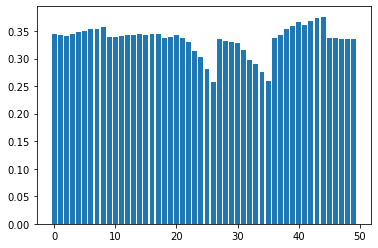

In [15]:
### Read single privacy score value
def normalize(score):
    range = np.max(score)-np.min(score)
    score = (score-np.min(score))/range
    return score

def compute_pri_score(score_list, class_idx):
    mean = np.mean(score_list)

    cls_mean = []
    for cls_idxs in class_idx.values():
        cls_score_list = [score_list[idx] for idx in cls_idxs]
        cls_mean.append(np.mean(cls_score_list))
    var = np.var(cls_mean)

    

    return mean, var

score_dir = '/home/zx/New_atsp/ATSPrivacy-new/search/data_cifar100_arch_ResNet20-4_single'
cls_pri_scores = []
mean_list, var_list = [], []
for i in range(50):
    content = np.load(score_dir + f'/{i}.npy', allow_pickle=True)
    # print(content)
    # psnr_list = [dic['test_psnr'] for dic in content]
    mean, var = compute_pri_score(content, labels)
    mean_list.append(mean); var_list.append(var)

alpha=0.7; beta=0.3
# mean_list, var_list = normalize(mean_list), normalize(var_list)
# cls_pri_scores = alpha*mean_list + beta*var_list

color_list = []
import matplotlib.pyplot as plt
plt.bar(range(50), mean_list)

idxs = np.argsort(cls_pri_scores)
idxs

7.315538845062256
7.586563191762784
8.206881951063107
8.003162837610013


In [41]:
import torch

a = torch.rand((1,4), requires_grad= True)
b = torch.rand((1,4),requires_grad= True)
c = a + b
d = 2*c
# torch.sum(c).backward(retain_graph=True)
# print(a.grad)
# print(torch.autograd.grad(torch.sum(d),a, retain_graph=True))

torch.sum(d).backward()
print(a.grad)


tensor([[2., 2., 2., 2.]])


In [68]:
import torch

loss = torch.nn.CrossEntropyLoss()
pred = torch.unsqueeze(torch.rand((8,1,256,256)).flatten(),1)
target = torch.rand((8,1,256,256)).flatten()
# target.requires_grad = True
pred = pred.repeat(1,2)
pred[:,0] =  1 - pred[:,1]
pred.requires_grad = True

target = target.type(torch.LongTensor)

l = loss(pred, target)
l.backward()
# pred.grad.shape
pred.grad


tensor([[-7.3901e-07,  7.3901e-07],
        [-9.5076e-07,  9.5076e-07],
        [-1.2412e-06,  1.2412e-06],
        ...,
        [-6.8894e-07,  6.8894e-07],
        [-1.2338e-06,  1.2338e-06],
        [-1.2585e-06,  1.2585e-06]])

In [13]:
import shutil
imgs_list=[1, 2, 3, 4, 6, 7, 8, 9, 10, 13, 14, 15]
imgs_list = [1,5,7,15,20,26,40,59,66,72,83]
comparison_polices = ['3-1-7+43-18-18','12-32-35+20-26-23']
for p in comparison_polices:
    img_dir=f"/home/zx/New_atsp/ATSPrivacy-new/benchmark/images/data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed_mode_aug_auglist_{p}_rlabel_False/"
    # img_dir="/home/zx/New_atsp/ATSPrivacy-new/benchmark/images/data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed_mode_aug_auglist_12-32-35+20-26-23_rlabel_False/"
    for index in imgs_list:
        ori_path = img_dir + f'ori_{index}.jpg'
        rec_path = img_dir + f'rec_{index}.jpg'

        shutil.copyfile(ori_path, f'/home/zx/New_atsp/ATSPrivacy-new/ablation/{p}/'+ f'ori_{index}.jpg')
        shutil.copyfile(rec_path, f'/home/zx/New_atsp/ATSPrivacy-new/ablation/{p}/'+ f'rec_{index}.jpg')
    

## draw pri-psnr relationship

<class 'numpy.float64'> <class 'numpy.float64'> <class 'numpy.float64'>


array([[1.        , 0.75552014],
       [0.75552014, 1.        ]])

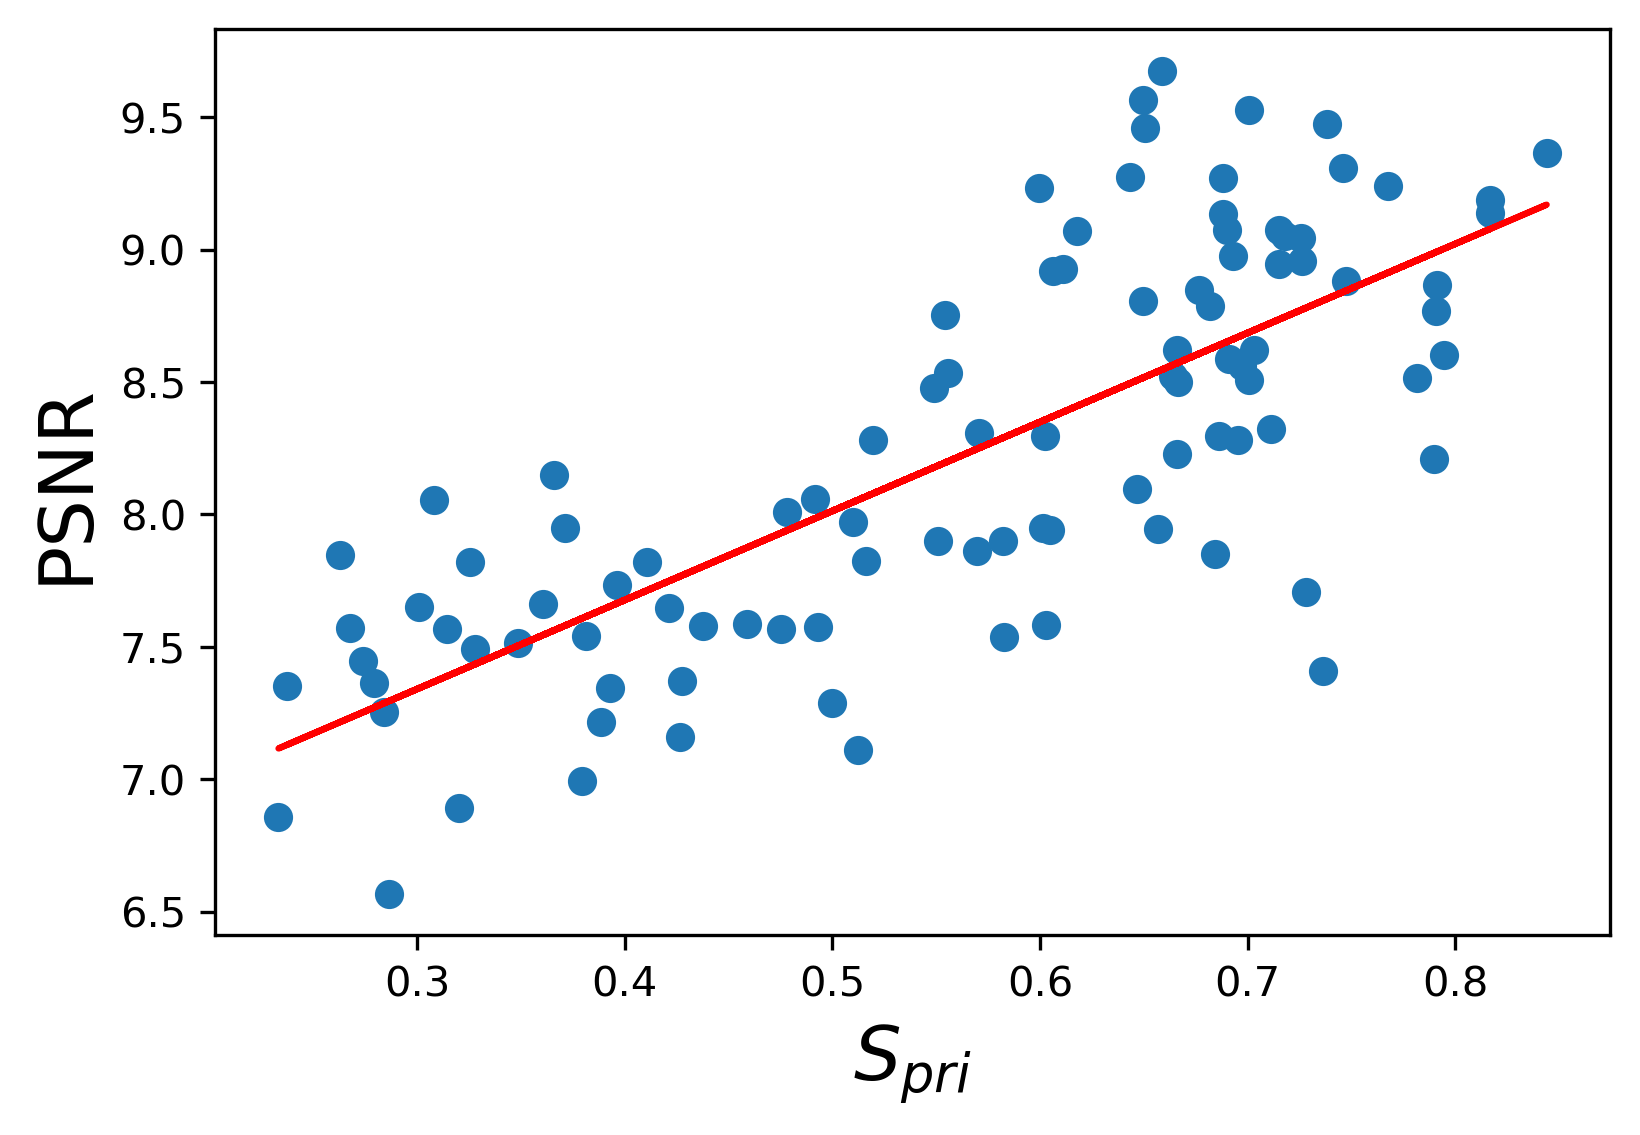

In [16]:
##### Need perform cifar100 search result to get variable policies and new_privacy_score_list 

from pathlib import Path
pri_dir = Path('/home/zx/New_atsp/ATSPrivacy-new/search/data_cifar100_arch_ResNet20-4')
# len([_ for i in img_dir.iterdir()])
imgs_dir = Path('/home/zx/New_atsp/ATSPrivacy-new/benchmark/images_100_cifar100_resnet_4')

dis = []
for i, folder in enumerate( imgs_dir.iterdir()):
    policy_name = folder.name.split('_')[-5]

    # pri_socre_file = pri_dir / (policy_name + '.npy')
    # pri_socre = np.load(str(pri_socre_file), allow_pickle=True)
    # pri_socre = np.mean(pri_socre)

    idx = policies.index(policy_name+'.npy')
    pri_score = new_privacy_score_list[idx]

    psnr_file = folder / 'metric.npy'
    psnr_score_dict = np.load(str(psnr_file), allow_pickle=True)
    psnr_score_list = [d['test_psnr'] for d in psnr_score_dict]
    psnr_score = np.mean(psnr_score_list)
    if psnr_score > 10:
        continue
    # if pri_score < 0.3 and psnr_score > 8:
    #     continue

    # if pri_score > 0.34 and psnr_score <7.2:
    #     continue
    # psnr_score = np.mean(psnr_score)

    dis.append((pri_score, psnr_score))
    if len(dis)>=200:
        break

x ,y = [item[0] for item in dis], [item[1] for item in dis]
import matplotlib.pyplot as plt
a,b = np.polyfit(x,y,1)
print(type(a), type(b), type(x[0]))
plt.figure(dpi=300)
plt.scatter(x,y)
plt.plot(x, [a*i+b for i in x], color='red')  
plt.xlabel('$S_{pri}$', fontsize=18)
plt.ylabel('PSNR', fontsize=18)
plt.savefig('pri_psnr.png',dpi=300)
np.corrcoef(x,y)


In [5]:
from PIL import Image
import torch
import numpy as np
import torchvision
import torchvision.transforms as transforms

img_path = '/home/zx/New_atsp/ATSPrivacy-new/benchmark/images/data_cifar100_arch_ConvNet32_epoch_100_optim_inversed_mode_aug_auglist_30-45-30+47-22-19_rlabel_False_atk_dlg/ori_1.png'
ground_truth = transforms.ToTensor()(Image.open(img_path)) 
noise_input = torch.rand((ground_truth.shape))

bin_num = 20
for dis_iter in range(bin_num+1):
    fake_ground_truth = (1.0 / bin_num * dis_iter * ground_truth + 1. / bin_num * (bin_num - dis_iter) * noise_input)
    # fake_ground_truth_PIL = transforms.ToPILImage()(fake_ground_truth)
    # torch.save(fake_ground_truth, f'assets/fake_{dis_iter}.png')
    torchvision.utils.save_image(fake_ground_truth.cpu().clone(), f'assets/fake_{dis_iter}.png')



In [4]:
from math import log10, sqrt
from pathlib import Path
import cv2
import numpy as np
import argparse
from PIL import Image
import torchvision.transforms as transforms
import inversefed

def PSNR(original, compressed):
	mse = np.mean((original - compressed) ** 2)
	if(mse == 0): # MSE is zero means no noise is present in the signal .
				# Therefore PSNR have no importance.
		return 100
	max_pixel = 255.0
	psnr = 20 * log10(max_pixel / sqrt(mse))
	return psnr

def compute_psnr_img(imgs_dir: str)-> list:
    '''
    compute psnr from images

    Args:
        imgs_dir: directory of images, including 100 original and recovery images
    Return:
        rec_psnr: psnr of recovery images
    '''
    rec_psnr = list()
    for i in range(0,100):
        ori_img = cv2.imread(imgs_dir + f'/{i}/transformed.png').astype('float32')
        rec_img = cv2.imread(imgs_dir + f'/{i}/reconstructed.png').astype('float32')
        value = PSNR(ori_img, rec_img)
        rec_psnr.append(value)

    return rec_psnr

# img_dir = '/home/zx/GitRepo/GradAttack/results/CIFAR10-1-InstaHideDefense-k{4}-c_1{0.0}-c_2{0.65}-device{cuda:0}-use_csprng{False}/tv=0.1BN_exact-bn=0.005-dataseed=None/Epoch_0'
img_dir = '/home/zx/GitRepo/GradAttack/results/CIFAR10-1-InstaHideDefense-k{6}-c_1{0.0}-c_2{0.65}-device{cuda:0}-use_csprng{False}/tv=0.1BN_exact-bn=0.005-dataseed=None/Epoch_0'

# np.mean(compute_psnr_img(img_dir))
print(np.var(compute_psnr_img(img_dir)))
# np.var(compute_psnr_img(img_dir))

0.3715952200710355


## compare lpips

In [21]:


from pathlib import Path
# from IPython.display import Image
from IPython.display import display
from PIL import Image
import torch, torchvision



    
def atoi(text):
        return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    import re
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

imgs_dir_list = [
'/home/zx/New_atsp/ATSPrivacy-new/benchmark/images/data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed_mode_normal_auglist__rlabel_False_atk_dlg',
'/home/zx/New_atsp/ATSPrivacy-new/benchmark/images/data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed_mode_aug_auglist_3-1-7+43-18-18_rlabel_False',
'/home/zx/New_atsp/ATSPrivacy-new/benchmark/images/data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed_mode_aug_auglist_12-32-35+20-26-23_rlabel_False',
'/home/zx/New_atsp/ATSPrivacy-new/benchmark/images/data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed_mode_crop_auglist__rlabel_False_df_prune_99',
'/home/zx/New_atsp/ATSPrivacy-new/benchmark/images/data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed_mode_crop_auglist__rlabel_False_df_gaussian_1e-2']
sim_list = []

for policy_img_dir in imgs_dir_list:
    ori_list=[]
    rec_list=[]
    imgs_list = []

    for name in Path(policy_img_dir).glob('ori*'):
        ori_list.append(name.name)
        is_first = False
    for name in Path(policy_img_dir).glob('rec*'):
        rec_list.append(name.name)
    
    ori_list.sort(key=natural_keys)
    rec_list.sort(key=natural_keys)

    ori_list.extend(rec_list)

    
    
    for name in ori_list:
        img_path = Path(policy_img_dir+'/'+name)
        imgs_list.append(torchvision.transforms.ToTensor()(Image.open(img_path)))
  
    imgs_tensor = torch.stack(imgs_list,dim=0)

    metrics = ['lpips']
    for m in metrics:
        sim_list.append(get_transforms_info(imgs_tensor, samples=100, metric=m))
sim_list
  
  

Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /home/zx/miniconda3/envs/torch1.8.1/lib/python3.8/site-packages/lpips/weights/v0.1/vgg.pth
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /home/zx/miniconda3/envs/torch1.8.1/lib/python3.8/site-packages/lpips/weights/v0.1/vgg.pth
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /home/zx/miniconda3/envs/torch1.8.1/lib/python3.8/site-packages/lpips/weights/v0.1/vgg.pth
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /home/zx/miniconda3/envs/torch1.8.1/lib/python3.8/site-packages/lpips/weights/v0.1/vgg.pth
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: /home/zx/miniconda3/envs/torch1.8.1/lib/python3.8/site-packages/lpips/weights/v0.1/vgg.pth


[[(0.3860761, 0.014713803)],
 [(0.4545156, 0.00647487)],
 [(0.5333558, 0.005007126)],
 [(0.51036286, 0.003785327)],
 [(0.5216904, 0.0037894282)]]

In [ ]:
def read_existing_policy(policy_dir):
    from pathlib import Path
    img_dir = Path(policy_dir)
    names = []
    for name in img_dir.iterdir():
        names.append(name.name.split('.')[0])
    return names

p_list = read_existing_policy('/home/zx/New_atsp/ATSPrivacy-new/search/data_FashionMinist_arch_ResNet20-4')
random.shuffle(policies)
for idx, p in enumerate(policies[:100]):
    command = f'CUDA_VISIBLE_DEVICES={idx%2} python benchmark/cifar100_attack.py --data=cifar100 --arch=ResNet20-4 --epochs=200 --aug_list={p[:-4]} --mode=aug --optim=inversed-2500 --attack=dlg --num_imgs 4 &'
    print(command)
    if (idx+1) % 4 == 0:
        print('wait')

## Generate batch sh

In [15]:
def get_name_from_sh(sh_file):
    with open(sh_file) as f:
        for command in f.readlines():
            if len(command.split(' ')) > 2:
                c = command.split(' ')[3][11:]
                yield c
                    

# g = get_name_from_sh('/home/zx/New_atsp/ATSPrivacy-new/batch_cifar100_5000.sh')
g = get_name_from_sh('batch_ResNet_ImageNet.sh')
g = range(50)
GPU=1
Per_GPU=4


for i, c in enumerate(g):
    # comm = f'CUDA_VISIBLE_DEVICES={i%GPU} python benchmark/search_transform_attack.py --aug_list={c} --mode=aug --arch=ResNet18_tv --data=ImageNet --epochs=10 --num_samples 50 &'
    comm = f'CUDA_VISIBLE_DEVICES={i%GPU} python benchmark/search_transform_attack.py --aug_list={c} --mode=aug --arch=ResNet20-4 --data=cifar100 --epochs=100 --num_samples 1 &'
    print(comm)
    if (i+1) % (GPU * Per_GPU) == 0:
        print('wait')

CUDA_VISIBLE_DEVICES=0 python benchmark/search_transform_attack.py --aug_list=0 --mode=aug --arch=ResNet20-4 --data=cifar100 --epochs=100 --num_samples 1 &
CUDA_VISIBLE_DEVICES=0 python benchmark/search_transform_attack.py --aug_list=1 --mode=aug --arch=ResNet20-4 --data=cifar100 --epochs=100 --num_samples 1 &
CUDA_VISIBLE_DEVICES=0 python benchmark/search_transform_attack.py --aug_list=2 --mode=aug --arch=ResNet20-4 --data=cifar100 --epochs=100 --num_samples 1 &
CUDA_VISIBLE_DEVICES=0 python benchmark/search_transform_attack.py --aug_list=3 --mode=aug --arch=ResNet20-4 --data=cifar100 --epochs=100 --num_samples 1 &
wait
CUDA_VISIBLE_DEVICES=0 python benchmark/search_transform_attack.py --aug_list=4 --mode=aug --arch=ResNet20-4 --data=cifar100 --epochs=100 --num_samples 1 &
CUDA_VISIBLE_DEVICES=0 python benchmark/search_transform_attack.py --aug_list=5 --mode=aug --arch=ResNet20-4 --data=cifar100 --epochs=100 --num_samples 1 &
CUDA_VISIBLE_DEVICES=0 python benchmark/search_transform_at

## Random policy evaluation


In [76]:
### generate run sh file
import random
def get_name_from_sh(sh_file):
    with open(sh_file) as f:
        for command in f.readlines():
            if len(command.split(' ')) > 2:
                c = command.split(' ')[3][11:]
                yield c

def print_command(names, data = 'cifar100', arch='ResNet20-4', epochs = 200, mode = 'aug', device_num = 2, samples=10):
    random.shuffle(names)
    for i,p in enumerate(names[:samples]):
        train_command_template = f'CUDA_VISIBLE_DEVICES={i % device_num} python benchmark/cifar100_train.py --data={data} --arch={arch} --epochs={epochs} --aug_list={p} --mode={mode} &'
        print(train_command_template)
    for i,p in enumerate(names[:samples]):
        attack_command_template =f'CUDA_VISIBLE_DEVICES={i % device_num} python benchmark/cifar100_attack.py --data={data} --arch={arch} --epochs={epochs} --aug_list={p} --mode={mode} --optim=inversed --attack=dlg &'
        print(attack_command_template)
    

base_sh_file = '/home/zx/New_atsp/ATSPrivacy-new/batch_cifar100.sh'
names = get_name_from_sh(base_sh_file)
names = [i for i in names]


print_command(names, data = 'cifar100', arch='ResNet20-4', epochs = 200, mode = 'aug', device_num = 2, samples=10)
print_command(names, data = 'cifar100', arch='ConvNet32', epochs = 100, mode = 'aug', device_num = 2, samples=10)

print_command(names, data = 'FashionMinist', arch='ResNet20-4', epochs = 200, mode = 'aug', device_num = 2, samples=10)
print_command(names, data = 'FashionMinist', arch='ConvNet8', epochs = 100, mode = 'aug', device_num = 2, samples=10)

CUDA_VISIBLE_DEVICES=0 python benchmark/cifar100_train.py --data=cifar100 --arch=ResNet20-4 --epochs=200 --aug_list=23-14-49 --mode=aug &
CUDA_VISIBLE_DEVICES=1 python benchmark/cifar100_train.py --data=cifar100 --arch=ResNet20-4 --epochs=200 --aug_list=46-35-6 --mode=aug &
CUDA_VISIBLE_DEVICES=0 python benchmark/cifar100_train.py --data=cifar100 --arch=ResNet20-4 --epochs=200 --aug_list=21-17 --mode=aug &
CUDA_VISIBLE_DEVICES=1 python benchmark/cifar100_train.py --data=cifar100 --arch=ResNet20-4 --epochs=200 --aug_list=22-29-43 --mode=aug &
CUDA_VISIBLE_DEVICES=0 python benchmark/cifar100_train.py --data=cifar100 --arch=ResNet20-4 --epochs=200 --aug_list=36-6-9 --mode=aug &
CUDA_VISIBLE_DEVICES=1 python benchmark/cifar100_train.py --data=cifar100 --arch=ResNet20-4 --epochs=200 --aug_list=49-25 --mode=aug &
CUDA_VISIBLE_DEVICES=0 python benchmark/cifar100_train.py --data=cifar100 --arch=ResNet20-4 --epochs=200 --aug_list=0-40-13 --mode=aug &
CUDA_VISIBLE_DEVICES=1 python benchmark/cifa

In [16]:
### Read Accuracy in checkpoint
from pathlib import Path
import numpy as np

random_cifar100_resnet_policy = ['23-14-49', '46-35-6', '21-17', '22-29-43', '36-6-9', '49-25', '0-40-13', '18-5-45', '23-25-3', '26-36-14']

random_cifar100_convnet_policy = ['15-4-22', '45-10-48', '41-19-35', '30-17-28', '27-18', '22-18-21', '16-22-27', '27-27-7', '28-6-29', '13-16-14']

random_fmnist_resnet_policy = ['31-2-12', '34-44-37', '31-43-3', '45-10-48', '2-10-41', '2-16-49', '12-24-23', '25-42-29', '47-14-1', '21-45-0']

random_fmnist_convnet_policy = ['22-4-15', '39-23-36', '39-37-25', '8-22-45', '3-50-45', '33-10-0', '33-33-40', '35-15-7', '43-40-16'] # , '26-33-35'


def get_policy_acc(data='cifar100', arch='ResNet20-4', policies=[], epoch=200):
    acc = []; psnr = []
    checkpoint_dir = Path('/home/zx/New_atsp/ATSPrivacy-new/checkpoints')
    imgs_dir = Path('/home/zx/New_atsp/ATSPrivacy-new/benchmark/images_random')

    for p in policies:
        file_dir =  f'data_{data}_arch_{arch}_mode_aug_auglist_{p}_rlabel_False'
        file_dir = checkpoint_dir / file_dir
        for file in file_dir.iterdir():
            if (name:=file.name).startswith('epoch'):
                acc.append(float(name.split('=')[-1][:-5]))

    for p in policies:
        file_path =  f'data_{data}_arch_{arch}_epoch_{epoch}_optim_inversed_mode_aug_auglist_{p}_rlabel_False_atk_dlg/metric.npy'
        file_path = imgs_dir / file_path
        content = np.load(str(file_path), allow_pickle=True)
        psnr_list = [item['test_psnr'] for item in content]
        # print(np.mean(psnr_list))
        psnr.append(np.mean(psnr_list))
        


    return np.mean(acc), np.mean(psnr)

print('cifar100_resnet: ', get_policy_acc(policies=random_cifar100_resnet_policy))
print('cifar100_convnet: ', get_policy_acc(arch='ConvNet32', policies=random_cifar100_convnet_policy, epoch=100))
print('fmnist_resnet: ', get_policy_acc(data='FashionMinist', arch='ResNet20-4', policies=random_fmnist_resnet_policy, epoch=200))
print('fmnist_convnet: ', get_policy_acc(data='FashionMinist', arch='ConvNet8', policies=random_fmnist_convnet_policy, epoch=100))


cifar100_resnet:  (0.697, 8.484350979328154)
cifar100_convnet:  (0.6180000000000001, 8.648744459152223)
fmnist_resnet:  (0.773, 8.975417020320894)
fmnist_convnet:  (0.7000000000000001, 8.336955245335897)


## ImageNet configuration

In [ ]:
CUDA_VISIBLE_DEVICES=0 python benchmark/cifar100_attack.py --data=ImageNet --arch=ResNet18 --epochs=0 --aug_list=12-32-35 --mode=aug --optim=inversed --attack=dlg --num_imgs 1

In [17]:
import numpy as np

def load_npy(path):
    return np.load(path, allow_pickle=True)
c12_32 = load_npy('/home/zx/New_atsp/ATSPrivacy-new/benchmark/images_100_cifar100_resnet_4/data_ImageNet_arch_ResNet20-4_epoch_0_optim_inversed-imagenet_mode_aug_auglist_12-32-35_rlabel_False_atk_dlg/metric.npy')

c_normal = load_npy('/home/zx/New_atsp/ATSPrivacy-new/benchmark/images_100_cifar100_resnet_4/data_ImageNet_arch_ResNet20-4_epoch_0_optim_inversed-imagenet_mode_aug_auglist__rlabel_False_atk_dlg/metric.npy')

# c_12 = load_npy('/home/zx/New_atsp/ATSPrivacy-new/benchmark/images_100_cifar100_resnet_4/data_ImageNet_arch_ResNet18_epoch_0_optim_inversed_mode_aug_auglist_12-32-35_rlabel_False_atk_dlg/metric.npy')

In [18]:
c12_32

array([{'test_mse': array(0.07453128, dtype=float32), 'feat_mse': tensor(0.9586, device='cuda:0', requires_grad=True), 'test_psnr': 11.276615142822266}],
      dtype=object)

In [19]:
c_normal

array([{'test_mse': array(0.03121468, dtype=float32), 'feat_mse': tensor(0.0266, device='cuda:0', requires_grad=True), 'test_psnr': 15.056410789489746}],
      dtype=object)

## Compute jpg psnr from png

In [46]:
from PIL import Image
import torchvision
from pathlib import Path
import numpy as np



# , '26-33-35'


def get_policy_acc(data='cifar100', arch='ResNet20-4', policies=[], epoch=200):
    psnr = []

    imgs_dir = Path('/home/zx/New_atsp/ATSPrivacy-new/benchmark/images_random')


    for p in policies:
        file_path =  f'data_{data}_arch_{arch}_epoch_{epoch}_optim_inversed_mode_aug_auglist_{p}_rlabel_False_atk_dlg/metric.npy'
        file_path = imgs_dir / file_path
        content = np.load(str(file_path), allow_pickle=True)
        psnr_list = [item['test_psnr'] for item in content]
        # print(np.mean(psnr_list))
        psnr.append(np.mean(psnr_list))

def compute_psnr_tensor(imgs_dir):
    save_dir = imgs_dir + '/' + '_jpg'
    if not Path.exists(Path(save_dir)):
        Path.mkdir(Path(save_dir))

    rec_psnr = list()
    for idx in range(1,11):
        
        # try:
        #     ori_img = cv2.imread(imgs_dir + f'/ori_{i}.jpg').astype('float32')
        #     rec_img = cv2.imread(imgs_dir + f'/rec_{i}.jpg').astype('float32')
        # except Exception as e:
        #     ori_img = cv2.imread(imgs_dir + f'/ori_{i}.png').astype('float32')
        #     rec_img = cv2.imread(imgs_dir + f'/rec_{i}.png').astype('float32')
        
        # ori_tensor = transforms.ToTensor()(ori_img)
        # rec_tensor = transforms.ToTensor()(rec_img)

        ori_tensor = transforms.ToTensor()(Image.open(f'{imgs_dir}/ori_{idx}.png'))
        rec_tensor = transforms.ToTensor()(Image.open(f'{imgs_dir}/rec_{idx}.png')) 

        torchvision.utils.save_image(ori_tensor.cpu().clone(), '{}/ori_{}.jpg'.format(save_dir, idx))
        torchvision.utils.save_image(rec_tensor.cpu().clone(), '{}/rec_{}.jpg'.format(save_dir, idx))

        ori_tensor = transforms.ToTensor()(Image.open(f'{save_dir}/ori_{idx}.jpg'))
        rec_tensor = transforms.ToTensor()(Image.open(f'{save_dir}/rec_{idx}.jpg')) 


        value = inversefed.metrics.psnr(rec_tensor, ori_tensor)
        rec_psnr.append(value)

    return rec_psnr, np.mean(rec_psnr)



### Random

In [ ]:
# random
random_cifar100_resnet_policy = ['23-14-49', '46-35-6', '21-17', '22-29-43', '36-6-9', '49-25', '0-40-13', '18-5-45', '23-25-3', '26-36-14']

random_cifar100_convnet_policy = ['15-4-22', '45-10-48', '41-19-35', '30-17-28', '27-18', '22-18-21', '16-22-27', '27-27-7', '28-6-29', '13-16-14']

random_fmnist_resnet_policy = ['31-2-12', '34-44-37', '31-43-3', '45-10-48', '2-10-41', '2-16-49', '12-24-23', '25-42-29', '47-14-1', '21-45-0']

random_fmnist_convnet_policy = ['22-4-15', '39-23-36', '39-37-25', '8-22-45', '3-50-45', '33-10-0', '33-33-40', '35-15-7', '43-40-16'] 

imgs_dir = '/home/zx/New_atsp/ATSPrivacy-new/benchmark/images_random'
data='FashionMinist';arch='ConvNet8';epoch=100
psnr_list = []
for p in random_fmnist_convnet_policy:
    img_dir =  f'data_{data}_arch_{arch}_epoch_{epoch}_optim_inversed_mode_aug_auglist_{p}_rlabel_False_atk_dlg'
    img_dir = imgs_dir + '/' + img_dir
    psnr_list.append(compute_psnr_tensor(img_dir))
print(np.mean(psnr_list))

### optim+loss

In [20]:
imgs_dir = '/home/zx/New_atsp/ATSPrivacy-new/benchmark/images'
data='cifar100';arch='ResNet20-4';epoch=200
psnr_list = []

#LBFGS+l2
LBFGS_l2 = '/home/zx/New_atsp/ATSPrivacy-new/benchmark/images/data_cifar100_arch_ResNet20-4_epoch_200_optim_zhu_mode_normal_auglist__rlabel_False_atk_dlg'

LBFGS_cos = '/home/zx/New_atsp/ATSPrivacy-new/benchmark/images/data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed-LBFGS-sim_mode_normal_auglist__rlabel_False_atk_dlg'

adam_l1 = '/home/zx/New_atsp/ATSPrivacy-new/benchmark/images/data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed-adam-L1_mode_normal_auglist__rlabel_False_atk_dlg'

adam_l2 = '/home/zx/New_atsp/ATSPrivacy-new/benchmark/images/data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed-adam-L2_mode_normal_auglist__rlabel_False_atk_dlg'

sgd_cos = '/home/zx/New_atsp/ATSPrivacy-new/benchmark/images/data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed-sgd-sim_mode_normal_auglist__rlabel_False_atk_dlg'

compute_psnr_tensor(sgd_cos)
# only compute for adam_cos and sgd_cos

12.363668303489685

### existing defense

In [29]:
gaussian_1e_3 = '/home/zx/New_atsp/ATSPrivacy-new/benchmark/images/data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed_mode_crop_auglist__rlabel_False_df_gaussian_1e-3'

gaussian_1e_2 = '/home/zx/New_atsp/ATSPrivacy-new/benchmark/images/data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed_mode_crop_auglist__rlabel_False_df_gaussian_1e-2'

lap_1e_3 = '/home/zx/New_atsp/ATSPrivacy-new/benchmark/images/data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed_mode_crop_auglist__rlabel_False_df_lap_1e-3'

lap_1e_2 = '/home/zx/New_atsp/ATSPrivacy-new/benchmark/images/data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed_mode_crop_auglist__rlabel_False_df_lap_1e-2'

prune_70 = '/home/zx/New_atsp/ATSPrivacy-new/benchmark/images/data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed_mode_crop_auglist__rlabel_False_df_prune_70'

prune_95 = '/home/zx/New_atsp/ATSPrivacy-new/benchmark/images/data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed_mode_crop_auglist__rlabel_False_df_prune_95'

prune_99 = '/home/zx/New_atsp/ATSPrivacy-new/benchmark/images/data_cifar100_arch_ResNet20-4_epoch_200_optim_inversed_mode_crop_auglist__rlabel_False_df_prune_99'

# np.mean(compute_psnr_img(prune_70))

## not change

10.374542314224005

In [107]:
psnr_list_noraml, _ = compute_psnr_tensor('/home/zx/New_atsp/ATSPrivacy-new/benchmark/images_100_cifar100_resnet_4/data_ImageNet_arch_ResNet20-4_epoch_0_optim_inversed-imagenet_mode_aug_auglist__rlabel_False_atk_dlg/')

psnr_list_12,_ = compute_psnr_tensor('/home/zx/New_atsp/ATSPrivacy-new/benchmark/images_100_cifar100_resnet_4/data_ImageNet_arch_ResNet20-4_epoch_0_optim_inversed-imagenet_mode_aug_auglist_12-32-35_rlabel_False_atk_dlg')

psnr_list_20, _ = compute_psnr_tensor('/home/zx/New_atsp/ATSPrivacy-new/benchmark/images_100_cifar100_resnet_4/data_ImageNet_arch_ResNet20-4_epoch_0_optim_inversed-imagenet_mode_aug_auglist_20-26-23_rlabel_False_atk_dlg')

psnr_list_hybrid, _ = compute_psnr_tensor('/home/zx/New_atsp/ATSPrivacy-new/benchmark/images_100_cifar100_resnet_4/data_ImageNet_arch_ResNet20-4_epoch_0_optim_inversed-imagenet_mode_aug_auglist_12-32-35+20-26-23_rlabel_False_atk_dlg')

p_list = []
for idx in [2,3, 8, 9]:
    p_list.append(psnr_list_hybrid[idx])
np.mean(p_list)

8.487631797790527

In [102]:
psnr_list_noraml
# np.mean(psnr_list_noraml)

[15.61429214477539,
 10.433582305908203,
 12.383731842041016,
 11.768507957458496,
 12.028512954711914,
 10.90079116821289,
 11.83479118347168,
 7.441934585571289,
 6.832740306854248,
 12.372688293457031]

In [103]:
p_list = []
for idx, i in enumerate( psnr_list_12):
    if not i > psnr_list_noraml[idx]:
        p_list.append(i)
np.mean(p_list)

psnr_list_12


[10.761159896850586,
 11.970919609069824,
 9.082149505615234,
 5.468945503234863,
 11.586904525756836,
 9.258840560913086,
 10.437527656555176,
 12.3620023727417,
 8.173727035522461,
 8.176301956176758]

In [104]:
p_list = []
for idx, i in enumerate( psnr_list_20):
    if not i > psnr_list_noraml[idx]:
        p_list.append(i)
np.mean(p_list)

psnr_list_20

[10.690731048583984,
 12.388182640075684,
 10.963294982910156,
 6.8410210609436035,
 9.505961418151855,
 13.260531425476074,
 9.921436309814453,
 10.681900024414062,
 8.755558013916016,
 5.410901069641113]

In [108]:
p_list = []
for idx, i in enumerate( psnr_list_hybrid):
    if not i > psnr_list_noraml[idx]:
        p_list.append(i)
np.mean(p_list)

# psnr_list_hybrid.sort()
# np.mean(psnr_list_hybrid[:5])

psnr_list_hybrid

[10.344518661499023,
 12.474824905395508,
 10.362872123718262,
 6.956957817077637,
 8.558265686035156,
 12.306058883666992,
 11.693058967590332,
 12.440441131591797,
 8.564106941223145,
 8.066590309143066]

## draw cifar100 train process

## single

In [3]:
for i in range(50):
    print(f'CUDA_VISIBLE_DEVICES={(i+1)%2} python benchmark/search_transform_attack.py --aug_list={i} --mode=aug --arch=ResNet20-4 --data=cifar100 --epochs=100 &')
    if (i+1) % 10 == 0:
        print('wait')

CUDA_VISIBLE_DEVICES=1 python benchmark/search_transform_attack.py --aug_list=0 --mode=aug --arch=ResNet20-4 --data=cifar100 --epochs=100 &
CUDA_VISIBLE_DEVICES=0 python benchmark/search_transform_attack.py --aug_list=1 --mode=aug --arch=ResNet20-4 --data=cifar100 --epochs=100 &
CUDA_VISIBLE_DEVICES=1 python benchmark/search_transform_attack.py --aug_list=2 --mode=aug --arch=ResNet20-4 --data=cifar100 --epochs=100 &
CUDA_VISIBLE_DEVICES=0 python benchmark/search_transform_attack.py --aug_list=3 --mode=aug --arch=ResNet20-4 --data=cifar100 --epochs=100 &
CUDA_VISIBLE_DEVICES=1 python benchmark/search_transform_attack.py --aug_list=4 --mode=aug --arch=ResNet20-4 --data=cifar100 --epochs=100 &
CUDA_VISIBLE_DEVICES=0 python benchmark/search_transform_attack.py --aug_list=5 --mode=aug --arch=ResNet20-4 --data=cifar100 --epochs=100 &
CUDA_VISIBLE_DEVICES=1 python benchmark/search_transform_attack.py --aug_list=6 --mode=aug --arch=ResNet20-4 --data=cifar100 --epochs=100 &
CUDA_VISIBLE_DEVICES

## generate policy ori img from index

In [67]:

import os, sys
sys.path.insert(0, '../')
import torch
import torchvision
seed=23333
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
import random
random.seed(seed)

import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from PIL import Image
import inversefed
import torchvision.transforms as transforms
import argparse
from autoaugment import SubPolicy
from inversefed.data.data_processing import _build_cifar100, _get_meanstd
import torch.nn.functional as F
from benchmark.comm import create_model, build_transform, preprocess, create_config
import policy
import copy

def save_transformd_imgs(policies, samples=[], data='FashionMinist', mode='aug'):
    '''
    Args
    policies: policy list include whole policy want to show
    smaples: the number of smaples for each policy
    data: dataset
    arch & epochs & model: only use to fill the class element, don't need to pass any arguments

    Return
    grid_imgs_trans: PIL image, first line is origin image, other lines are transformed images according to policy list
    imgs_trans: tensor list, length: len(policies+1)*samples
    
    '''

    class general_args:
        def __init__(self) -> None:
            self.rlabel = False
            self.evaluate = False
            self.data = data
            self.mode = mode
            self.aug_list = ''

    opt = general_args()
    defs= inversefed.training_strategy('conservative')
    # loss_fn, trainloader, validloader = preprocess(opt, defs,valid=True)

    # if opt.data == 'cifar100':
    #     _,validset_origin = _build_cifar100('~/data/')
    # elif opt.data == 'FashionMinist':
    #     validset_origin =  torchvision.datasets.FashionMNIST('~/data/', train=False, download=True,
    #                         transform=transforms.Compose([
    #                             lambda x: transforms.functional.to_grayscale(x, num_output_channels=1),
    #                             transforms.Resize(32),
    #                             transforms.ToTensor(),
    #                             transforms.Normalize((0.1307,), (0.3081,))
    #                         ]))
    # validset_origin.transform.transforms = validset_origin.transform.transforms[:-1]

    # imgs_trans = []
    # for i in range(samples):
    #     imgs_trans.append(validset_origin[i][0])

  
    show_policies = policies

    from tqdm import tqdm
    from pathlib import Path
    for p in tqdm(show_policies):
        # from IPython.display import clear_output
        # clear_output(wait=True)
        opt.aug_list = p

        loss_fn, trainloader, validloader = preprocess(opt, defs,valid=True)
        validloader.dataset.transform.transforms = validloader.dataset.transform.transforms[:-1]

        for idx in samples:
            transformed_img,_ = validloader.dataset[idx-1] # because img idx in paper start with 1
            # imgs_trans.append(transformed_img)
            save_dir = f'./{p}'
            if not Path.exists(Path(save_dir)):
                Path.mkdir(Path(save_dir))
            torchvision.utils.save_image(transformed_img.cpu().clone(), save_dir + f'/ori_{idx}.jpg')

    # imgs_trans = torch.stack(imgs_trans,dim=0)

    # grid_imgs_trans = transforms.ToPILImage()(torchvision.utils.make_grid(imgs_trans, nrow=samples,padding=6))

    # return grid_imgs_trans, imgs_trans

In [69]:
cifar100_resnet = [21, 22, 98, 69, 14, 87, 91, 36, 43, 57, 61, 38]
cifar100_convnet = [13, 68, 82, 97, 71, 91, 18, 99, 53, 7, 40, 47]

fmnist_resnet = [8, 56, 17, 41, 5, 6, 97, 65, 22, 60, 59, 69]
fmnist_convnet = [11, 21, 62, 39, 24, 29, 35, 70, 22, 25, 48, 32]


# save_transformd_imgs(['24-34-21+26-39-40'], samples=fmnist_resnet, data='FashionMinist')


# save_transformd_imgs(['21-13-3+15-48-15'], samples=cifar100_convnet, data='cifar100')
# save_transformd_imgs(['24-34-21+26-39-40'], samples=fmnist_resnet, data='FashionMinist')
save_transformd_imgs(['8-43-42+15-27-13'], samples=fmnist_convnet, data='FashionMinist')


  0%|          | 0/1 [00:00<?, ?it/s]

Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 1/1 [00:02<00:00,  2.17s/it]

~/data/
[<function build_transform.<locals>.<lambda> at 0x7fa7593ded30>, <function build_transform.<locals>.<lambda> at 0x7fa7597410d0>, Resize(size=32, interpolation=bilinear), ToTensor(), Normalize(mean=(0.1307,), std=(0.3081,))]
[<function build_transform.<locals>.<lambda> at 0x7fa759741670>, RandomCrop(size=(32, 32), padding=4), RandomHorizontalFlip(p=0.5), <benchmark.comm.sub_transform object at 0x7fa849019bb0>, <function build_transform.<locals>.<lambda> at 0x7fa759741700>, Resize(size=32, interpolation=bilinear), ToTensor(), Normalize(mean=(0.1307,), std=(0.3081,))]


In [43]:
import torch, torchvision

data_dir = '/home/zx/nfs/server3/data/'
dataset = torchvision.datasets.CelebA(data_dir, split='all', target_type='identity')





In [44]:
from collections import defaultdict
idx = defaultdict(int)
for img, label in dataset:
    # print(label)
    idx[label.item()] += 1
    

In [45]:
print(len(idx.keys()))
list(idx.values())
idetnity_30 = []
for key, value in idx.items():
    if value == 30:
        idetnity_30.append(key)
len(idetnity_30)

# import numpy as np
# print(len(dataset))
# np.sum(list(idx.values()))
        

10177


2343